In [1]:
import os
import pandas as pd
import numpy as np
import copy

import seaborn as sns

import sklearn.ensemble 
from sklearn.ensemble import StackingRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import BaggingRegressor, ExtraTreesRegressor
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
import sklearn.linear_model
from sklearn.linear_model import LinearRegression, LassoLarsCV
from sklearn.metrics import mean_squared_log_error
import sklearn.svm
from sklearn.svm import SVR, LinearSVR
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.linear_model import RidgeCV, LassoCV

from sklearn import linear_model
from sklearn.metrics import r2_score

import warnings


import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
df = pd.read_excel('Hospital - Data.xlsx')

In [3]:
df.count()

SL.                             248
AGE                             248
GENDER                          248
MARITAL STATUS                  248
KEY COMPLAINTS -CODE            212
BODY WEIGHT                     248
BODY HEIGHT                     248
HR PULSE                        248
BP -HIGH                        225
BP-LOW                          225
RR                              248
PAST MEDICAL HISTORY CODE        75
HB                              246
UREA                            235
CREATININE                      215
MODE OF ARRIVAL                 248
STATE AT THE TIME OF ARRIVAL    248
TYPE OF ADMSN                   248
TOTAL LENGTH OF STAY            248
LENGTH OF STAY - ICU            248
LENGTH OF STAY- WARD            248
IMPLANT USED (Y/N)              248
COST OF IMPLANT                 248
TOTAL COST TO HOSPITAL          248
dtype: int64

In [4]:
df = df.set_index('SL.')
df.head()

,AGE,GENDER,MARITAL STATUS,KEY COMPLAINTS -CODE,BODY WEIGHT,BODY HEIGHT,HR PULSE,BP -HIGH,BP-LOW,RR,PAST MEDICAL HISTORY CODE,HB,UREA,CREATININE,MODE OF ARRIVAL,STATE AT THE TIME OF ARRIVAL,TYPE OF ADMSN,TOTAL LENGTH OF STAY,LENGTH OF STAY - ICU,LENGTH OF STAY- WARD,IMPLANT USED (Y/N),COST OF IMPLANT,TOTAL COST TO HOSPITAL
SL.,,,,,,,,,,,,,,,,,,,,,,,
1,58.0,M,MARRIED,other- heart,49.2,160,118,100.0,80.0,32,NaN,11.4,33.0,0.8,AMBULANCE,ALERT,EMERGENCY,25,12,13,Y,38000,660293.0
2,59.0,M,MARRIED,CAD-DVD,41.0,155,78,70.0,50.0,28,NaN,11.4,95.0,1.7,AMBULANCE,ALERT,EMERGENCY,41,20,21,Y,39690,809130.0
3,82.0,M,MARRIED,CAD-TVD,46.6,164,100,110.0,80.0,20,Diabetes2,11.8,15.0,0.8,WALKED IN,ALERT,ELECTIVE,18,9,9,N,0,362231.0
4,46.0,M,MARRIED,CAD-DVD,80.0,173,122,110.0,80.0,24,hypertension1,11.8,74.0,1.5,AMBULANCE,ALERT,EMERGENCY,14,13,1,Y,89450,629990.0
5,60.0,M,MARRIED,CAD-DVD,58.0,175,72,180.0,100.0,18,Diabetes2,10.0,48.0,1.9,AMBULANCE,ALERT,EMERGENCY,24,12,12,N,0,444876.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248 entries, 1 to 248
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   AGE                           248 non-null    float64
 1   GENDER                        248 non-null    object 
 2   MARITAL STATUS                248 non-null    object 
 3   KEY COMPLAINTS -CODE          212 non-null    object 
 4   BODY WEIGHT                   248 non-null    float64
 5   BODY HEIGHT                   248 non-null    int64  
 6   HR PULSE                      248 non-null    int64  
 7   BP -HIGH                      225 non-null    float64
 8   BP-LOW                        225 non-null    float64
 9   RR                            248 non-null    int64  
 10  PAST MEDICAL HISTORY CODE     75 non-null     object 
 11  HB                            246 non-null    float64
 12  UREA                          235 non-null    float64
 13  CREAT

In [6]:
df.describe()

,AGE,BODY WEIGHT,BODY HEIGHT,HR PULSE,BP -HIGH,BP-LOW,RR,HB,UREA,CREATININE,TOTAL LENGTH OF STAY,LENGTH OF STAY - ICU,LENGTH OF STAY- WARD,COST OF IMPLANT,TOTAL COST TO HOSPITAL
count,248.000000,248.000000,248.000000,248.000000,225.000000,225.000000,248.000000,246.000000,235.000000,215.000000,248.000000,248.000000,248.000000,248.000000,248.000000
mean,28.879837,37.524677,130.221774,92.229839,115.022222,71.875556,23.540323,12.894553,26.581702,0.746977,11.612903,3.475806,8.153226,8544.201613,198723.330282
std,25.899359,23.118822,39.170901,20.308740,22.536368,15.313176,3.840756,3.083237,15.998367,0.548641,5.392617,3.853520,3.755793,21521.877503,122587.492984
min,0.032877,2.020000,19.000000,41.000000,70.000000,39.000000,12.000000,5.000000,2.000000,0.100000,3.000000,0.000000,0.000000,0.000000,46093.000000
25%,6.000000,15.000000,105.000000,78.000000,100.000000,60.000000,22.000000,11.300000,18.000000,0.300000,8.000000,1.000000,6.000000,0.000000,131652.750000
50%,15.500000,40.900000,147.500000,90.000000,110.000000,70.000000,24.000000,12.350000,22.000000,0.700000,10.000000,2.000000,7.000000,0.000000,162660.500000
75%,55.000000,58.250000,160.000000,104.000000,130.000000,80.000000,24.000000,14.000000,30.000000,1.000000,13.000000,4.000000,10.000000,0.000000,220614.000000
max,88.000000,85.000000,185.000000,155.000000,215.000000,140.000000,42.000000,25.700000,143.000000,5.200000,41.000000,30.000000,22.000000,196848.000000,887350.000000


In [7]:
numerical_cols = ['AGE', 'BODY WEIGHT', 'BODY HEIGHT', 'HR PULSE', 'BP -HIGH', 'BP-LOW', 'RR', 'HB', 'UREA', 
                  'CREATININE', 'TOTAL LENGTH OF STAY', 'LENGTH OF STAY - ICU', 'LENGTH OF STAY- WARD', 
                  'COST OF IMPLANT']

categorical_cols = ['GENDER', 'MARITAL STATUS', 'KEY COMPLAINTS -CODE', 'PAST MEDICAL HISTORY CODE', 
                    'MODE OF ARRIVAL', 'STATE AT THE TIME OF ARRIVAL', 'TYPE OF ADMSN', 'IMPLANT USED (Y/N)']

target_col = 'TOTAL COST TO HOSPITAL '

In [8]:
df[numerical_cols].head(2)

,AGE,BODY WEIGHT,BODY HEIGHT,HR PULSE,BP -HIGH,BP-LOW,RR,HB,UREA,CREATININE,TOTAL LENGTH OF STAY,LENGTH OF STAY - ICU,LENGTH OF STAY- WARD,COST OF IMPLANT
SL.,,,,,,,,,,,,,,
1,58.0,49.2,160,118,100.0,80.0,32,11.4,33.0,0.8,25,12,13,38000
2,59.0,41.0,155,78,70.0,50.0,28,11.4,95.0,1.7,41,20,21,39690


In [9]:
df[categorical_cols].head(2)

,GENDER,MARITAL STATUS,KEY COMPLAINTS -CODE,PAST MEDICAL HISTORY CODE,MODE OF ARRIVAL,STATE AT THE TIME OF ARRIVAL,TYPE OF ADMSN,IMPLANT USED (Y/N)
SL.,,,,,,,,
1,M,MARRIED,other- heart,NaN,AMBULANCE,ALERT,EMERGENCY,Y
2,M,MARRIED,CAD-DVD,NaN,AMBULANCE,ALERT,EMERGENCY,Y


## Generating the Correlation Matrix

Without any further processing, the correlation matrix will be computed on the numerical columns only

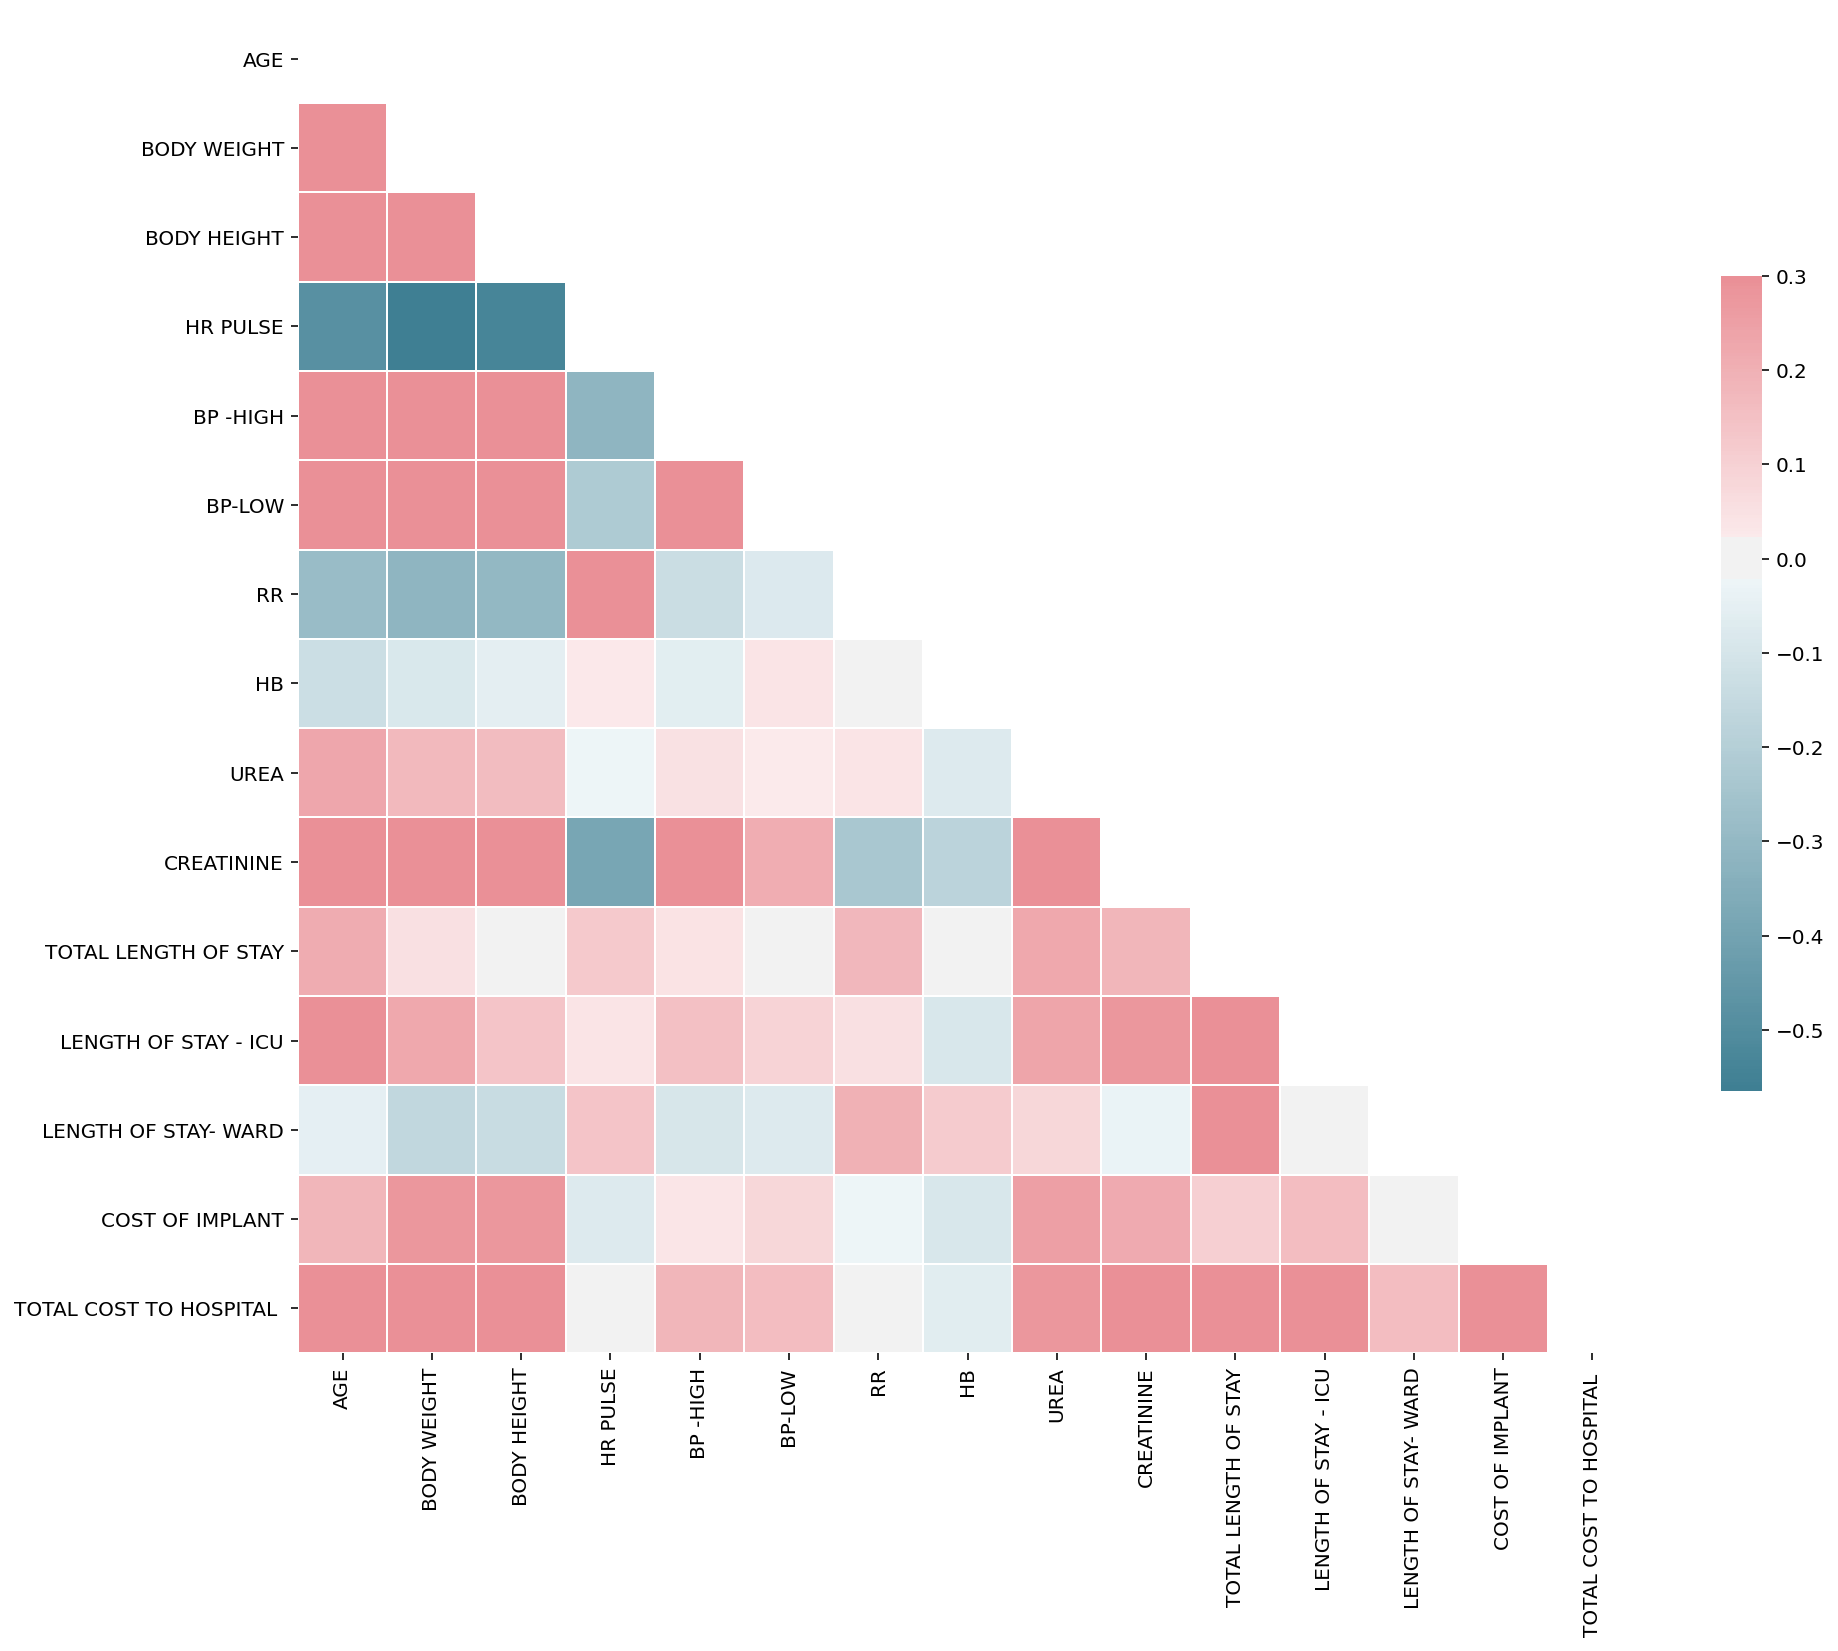

In [10]:
def plot_corr(df):
    corr = df.corr()
    mask = np.triu(np.ones_like(corr, dtype=np.bool))
    f, ax = plt.subplots(figsize=(15, 15))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

plot_corr(df)

# Data Exploration and Outliers Investigation 

### Noting that record #37 is likely incorrect when age is concerned

Even though weight and height indicate an adult with Type 2 Diabetes, but the age is incorrectly set to 10 months

In [11]:
# Noting that record #37 is likely incorrect when age is concerned
df.loc[37][['AGE', 'GENDER', 'BODY WEIGHT', 'BODY HEIGHT']]

AGE            0.833333
GENDER                M
BODY WEIGHT          78
BODY HEIGHT         173
Name: 37, dtype: object

An easy fix (instead of throwing away this record) is to find out what all other patients with Type 2 Diabetes have as average age, then do one more check that they have all the same range of weights and heights as #37, and then assign the average to #37

In [12]:
df_del = df.drop([37], axis=0)
df_del[df_del['PAST MEDICAL HISTORY CODE'] == 'Diabetes2'].head(20)

,AGE,GENDER,MARITAL STATUS,KEY COMPLAINTS -CODE,BODY WEIGHT,BODY HEIGHT,HR PULSE,BP -HIGH,BP-LOW,RR,PAST MEDICAL HISTORY CODE,HB,UREA,CREATININE,MODE OF ARRIVAL,STATE AT THE TIME OF ARRIVAL,TYPE OF ADMSN,TOTAL LENGTH OF STAY,LENGTH OF STAY - ICU,LENGTH OF STAY- WARD,IMPLANT USED (Y/N),COST OF IMPLANT,TOTAL COST TO HOSPITAL
SL.,,,,,,,,,,,,,,,,,,,,,,,
3,82.0,M,MARRIED,CAD-TVD,46.6,164,100,110.0,80.0,20,Diabetes2,11.8,15.0,0.8,WALKED IN,ALERT,ELECTIVE,18,9,9,N,0,362231.00
5,60.0,M,MARRIED,CAD-DVD,58.0,175,72,180.0,100.0,18,Diabetes2,10.0,48.0,1.9,AMBULANCE,ALERT,EMERGENCY,24,12,12,N,0,444876.00
7,73.0,M,MARRIED,CAD-TVD,60.0,170,108,160.0,90.0,24,Diabetes2,14.5,31.0,1.6,WALKED IN,ALERT,ELECTIVE,15,15,0,N,0,887350.00
9,72.0,M,MARRIED,CAD-DVD,72.0,174,95,100.0,50.0,25,Diabetes2,9.6,32.0,1.2,AMBULANCE,ALERT,EMERGENCY,26,9,17,N,0,437529.07
22,62.0,M,MARRIED,CAD-TVD,74.0,160,60,160.0,70.0,24,Diabetes2,9.7,31.0,1.1,WALKED IN,ALERT,ELECTIVE,9,8,1,N,0,288960.00
25,60.0,F,MARRIED,CAD-TVD,53.0,155,85,110.0,70.0,30,Diabetes2,10.3,36.0,1.4,AMBULANCE,ALERT,EMERGENCY,11,11,0,Y,38000,361738.00
28,47.0,M,MARRIED,CAD-TVD,73.1,171,87,100.0,70.0,22,Diabetes2,14.6,76.0,2.3,AMBULANCE,ALERT,EMERGENCY,15,6,10,N,0,278213.73
188,56.0,M,MARRIED,CAD-TVD,85.0,173,100,140.0,90.0,20,Diabetes2,12.1,19.0,0.8,WALKED IN,ALERT,ELECTIVE,9,4,5,N,0,191102.00


In [13]:
df_del = df.drop([37], axis=0)
mean_age = df_del[df_del['PAST MEDICAL HISTORY CODE'] == 'Diabetes2']['AGE'].mean()
print(mean_age)
df.at[37, 'AGE'] = mean_age

64.0


In [14]:
df.at[37, 'AGE'] = 64
df[35:38].head()

,AGE,GENDER,MARITAL STATUS,KEY COMPLAINTS -CODE,BODY WEIGHT,BODY HEIGHT,HR PULSE,BP -HIGH,BP-LOW,RR,PAST MEDICAL HISTORY CODE,HB,UREA,CREATININE,MODE OF ARRIVAL,STATE AT THE TIME OF ARRIVAL,TYPE OF ADMSN,TOTAL LENGTH OF STAY,LENGTH OF STAY - ICU,LENGTH OF STAY- WARD,IMPLANT USED (Y/N),COST OF IMPLANT,TOTAL COST TO HOSPITAL
SL.,,,,,,,,,,,,,,,,,,,,,,,
36,0.833333,M,UNMARRIED,other- heart,6.0,68,120,NaN,NaN,22,NaN,10.4,24.0,0.3,WALKED IN,ALERT,ELECTIVE,32,30,2,N,0,551809.0
37,64.000000,M,MARRIED,CAD-TVD,78.0,173,82,130.0,80.0,24,Diabetes2,13.0,82.0,2.0,WALKED IN,ALERT,ELECTIVE,12,5,7,N,0,293127.0
38,63.000000,F,MARRIED,other- heart,59.0,162,76,150.0,80.0,15,hypertension3,12.0,28.0,1.0,WALKED IN,ALERT,ELECTIVE,16,5,11,N,0,260036.0


In [15]:
df[115:120].head()

,AGE,GENDER,MARITAL STATUS,KEY COMPLAINTS -CODE,BODY WEIGHT,BODY HEIGHT,HR PULSE,BP -HIGH,BP-LOW,RR,PAST MEDICAL HISTORY CODE,HB,UREA,CREATININE,MODE OF ARRIVAL,STATE AT THE TIME OF ARRIVAL,TYPE OF ADMSN,TOTAL LENGTH OF STAY,LENGTH OF STAY - ICU,LENGTH OF STAY- WARD,IMPLANT USED (Y/N),COST OF IMPLANT,TOTAL COST TO HOSPITAL
SL.,,,,,,,,,,,,,,,,,,,,,,,
116,37.0,M,MARRIED,other- heart,46.0,62,96,140.0,90.0,20,NaN,5.0,NaN,NaN,WALKED IN,ALERT,ELECTIVE,10,2,8,Y,56000,182651.00
117,16.0,F,UNMARRIED,other- heart,41.0,162,74,100.0,70.0,24,NaN,12.4,19.0,0.4,WALKED IN,ALERT,ELECTIVE,12,2,10,Y,77450,323960.00
118,5.0,M,UNMARRIED,other- heart,3.3,22,140,102.0,80.0,30,other,12.7,26.0,0.3,WALKED IN,ALERT,ELECTIVE,19,4,15,N,0,159327.38
119,5.0,M,UNMARRIED,other- respiratory,15.4,98,123,90.0,50.0,24,NaN,22.8,19.0,0.3,WALKED IN,ALERT,ELECTIVE,11,3,8,N,0,131430.00
120,3.0,F,UNMARRIED,other-tertalogy,10.0,85,116,84.0,70.0,24,NaN,18.5,23.0,0.3,WALKED IN,ALERT,ELECTIVE,13,3,10,N,0,180415.67


## Looking for missing values

In [16]:
missing_num_cols = []

for c in numerical_cols:
    count = len(df[df[c].isnull()])
    print('Missing Values in', c, ':', count)
    if count > 0: missing_num_cols.append(c)

Missing Values in AGE : 0
Missing Values in BODY WEIGHT : 0
Missing Values in BODY HEIGHT : 0
Missing Values in HR PULSE : 0
Missing Values in BP -HIGH : 23
Missing Values in BP-LOW : 23
Missing Values in RR : 0
Missing Values in HB : 2
Missing Values in UREA : 13
Missing Values in CREATININE : 33
Missing Values in TOTAL LENGTH OF STAY : 0
Missing Values in LENGTH OF STAY - ICU : 0
Missing Values in LENGTH OF STAY- WARD : 0
Missing Values in COST OF IMPLANT : 0


In [17]:
for c in categorical_cols:
    print('Missing Values in', c, ':', len(df[df[c].isnull()]))

Missing Values in GENDER : 0
Missing Values in MARITAL STATUS : 0
Missing Values in KEY COMPLAINTS -CODE : 36
Missing Values in PAST MEDICAL HISTORY CODE : 173
Missing Values in MODE OF ARRIVAL : 0
Missing Values in STATE AT THE TIME OF ARRIVAL : 0
Missing Values in TYPE OF ADMSN : 0
Missing Values in IMPLANT USED (Y/N) : 0


### Filling in missing numerical values
For missing values in numerical columns, we can impute values, based on the median of the column. 

For missing values in categorical columns, we need to take a closer look, which we will do shortly.

In [18]:
for c in missing_num_cols:
    imp = SimpleImputer(missing_values=np.nan, strategy='median')
    new_vals = imp.fit_transform(df[[c]])
    df[c] = new_vals

# Data Cleaning and Data Pre-processing

## Working on Categorical Data 

### Field "PAST MEDICAL HISTORY CODE"

In [19]:
# noting that there many NaN values, as well as Hypertension with a capital H
df['KEY COMPLAINTS -CODE'] = df['KEY COMPLAINTS -CODE'].fillna('none')
df['KEY COMPLAINTS -CODE'].value_counts()

other- heart          55
none                  36
CAD-DVD               27
RHD                   26
CAD-TVD               24
ACHD                  19
other-tertalogy       18
other- respiratory    15
OS-ASD                15
PM-VSD                 6
other-nervous          3
CAD-SVD                2
other-general          1
CAD-VSD                1
Name: KEY COMPLAINTS -CODE, dtype: int64

In [20]:
# noting that there many NaN values, as well as Hypertension with a capital H
df['PAST MEDICAL HISTORY CODE'] = df['PAST MEDICAL HISTORY CODE'].fillna('none').apply(lambda x: x.lower())
df['PAST MEDICAL HISTORY CODE'].value_counts()

none             173
hypertension1     23
other             15
hypertension2     13
diabetes1         10
diabetes2          9
hypertension3      5
Name: PAST MEDICAL HISTORY CODE, dtype: int64

In [21]:
df['GENDER'].value_counts()

M    166
F     82
Name: GENDER, dtype: int64

In [22]:
df['MARITAL STATUS'].value_counts()

UNMARRIED    140
MARRIED      108
Name: MARITAL STATUS, dtype: int64

In [23]:
df['MODE OF ARRIVAL'].value_counts()

WALKED IN      214
AMBULANCE       30
TRANSFERRED      4
Name: MODE OF ARRIVAL, dtype: int64

In [24]:
df['TYPE OF ADMSN'].value_counts()

ELECTIVE     216
EMERGENCY     32
Name: TYPE OF ADMSN, dtype: int64

In [25]:
df['IMPLANT USED (Y/N)'].value_counts()

N    199
Y     49
Name: IMPLANT USED (Y/N), dtype: int64

In [26]:
df['STATE AT THE TIME OF ARRIVAL'].value_counts()

ALERT       247
CONFUSED      1
Name: STATE AT THE TIME OF ARRIVAL, dtype: int64

### Revisiting the Correlation Matrix 
After taking care of the missing values, we now label-encode categorical data into numerical values, so that we can plot the correlation matrix with the categorical data.

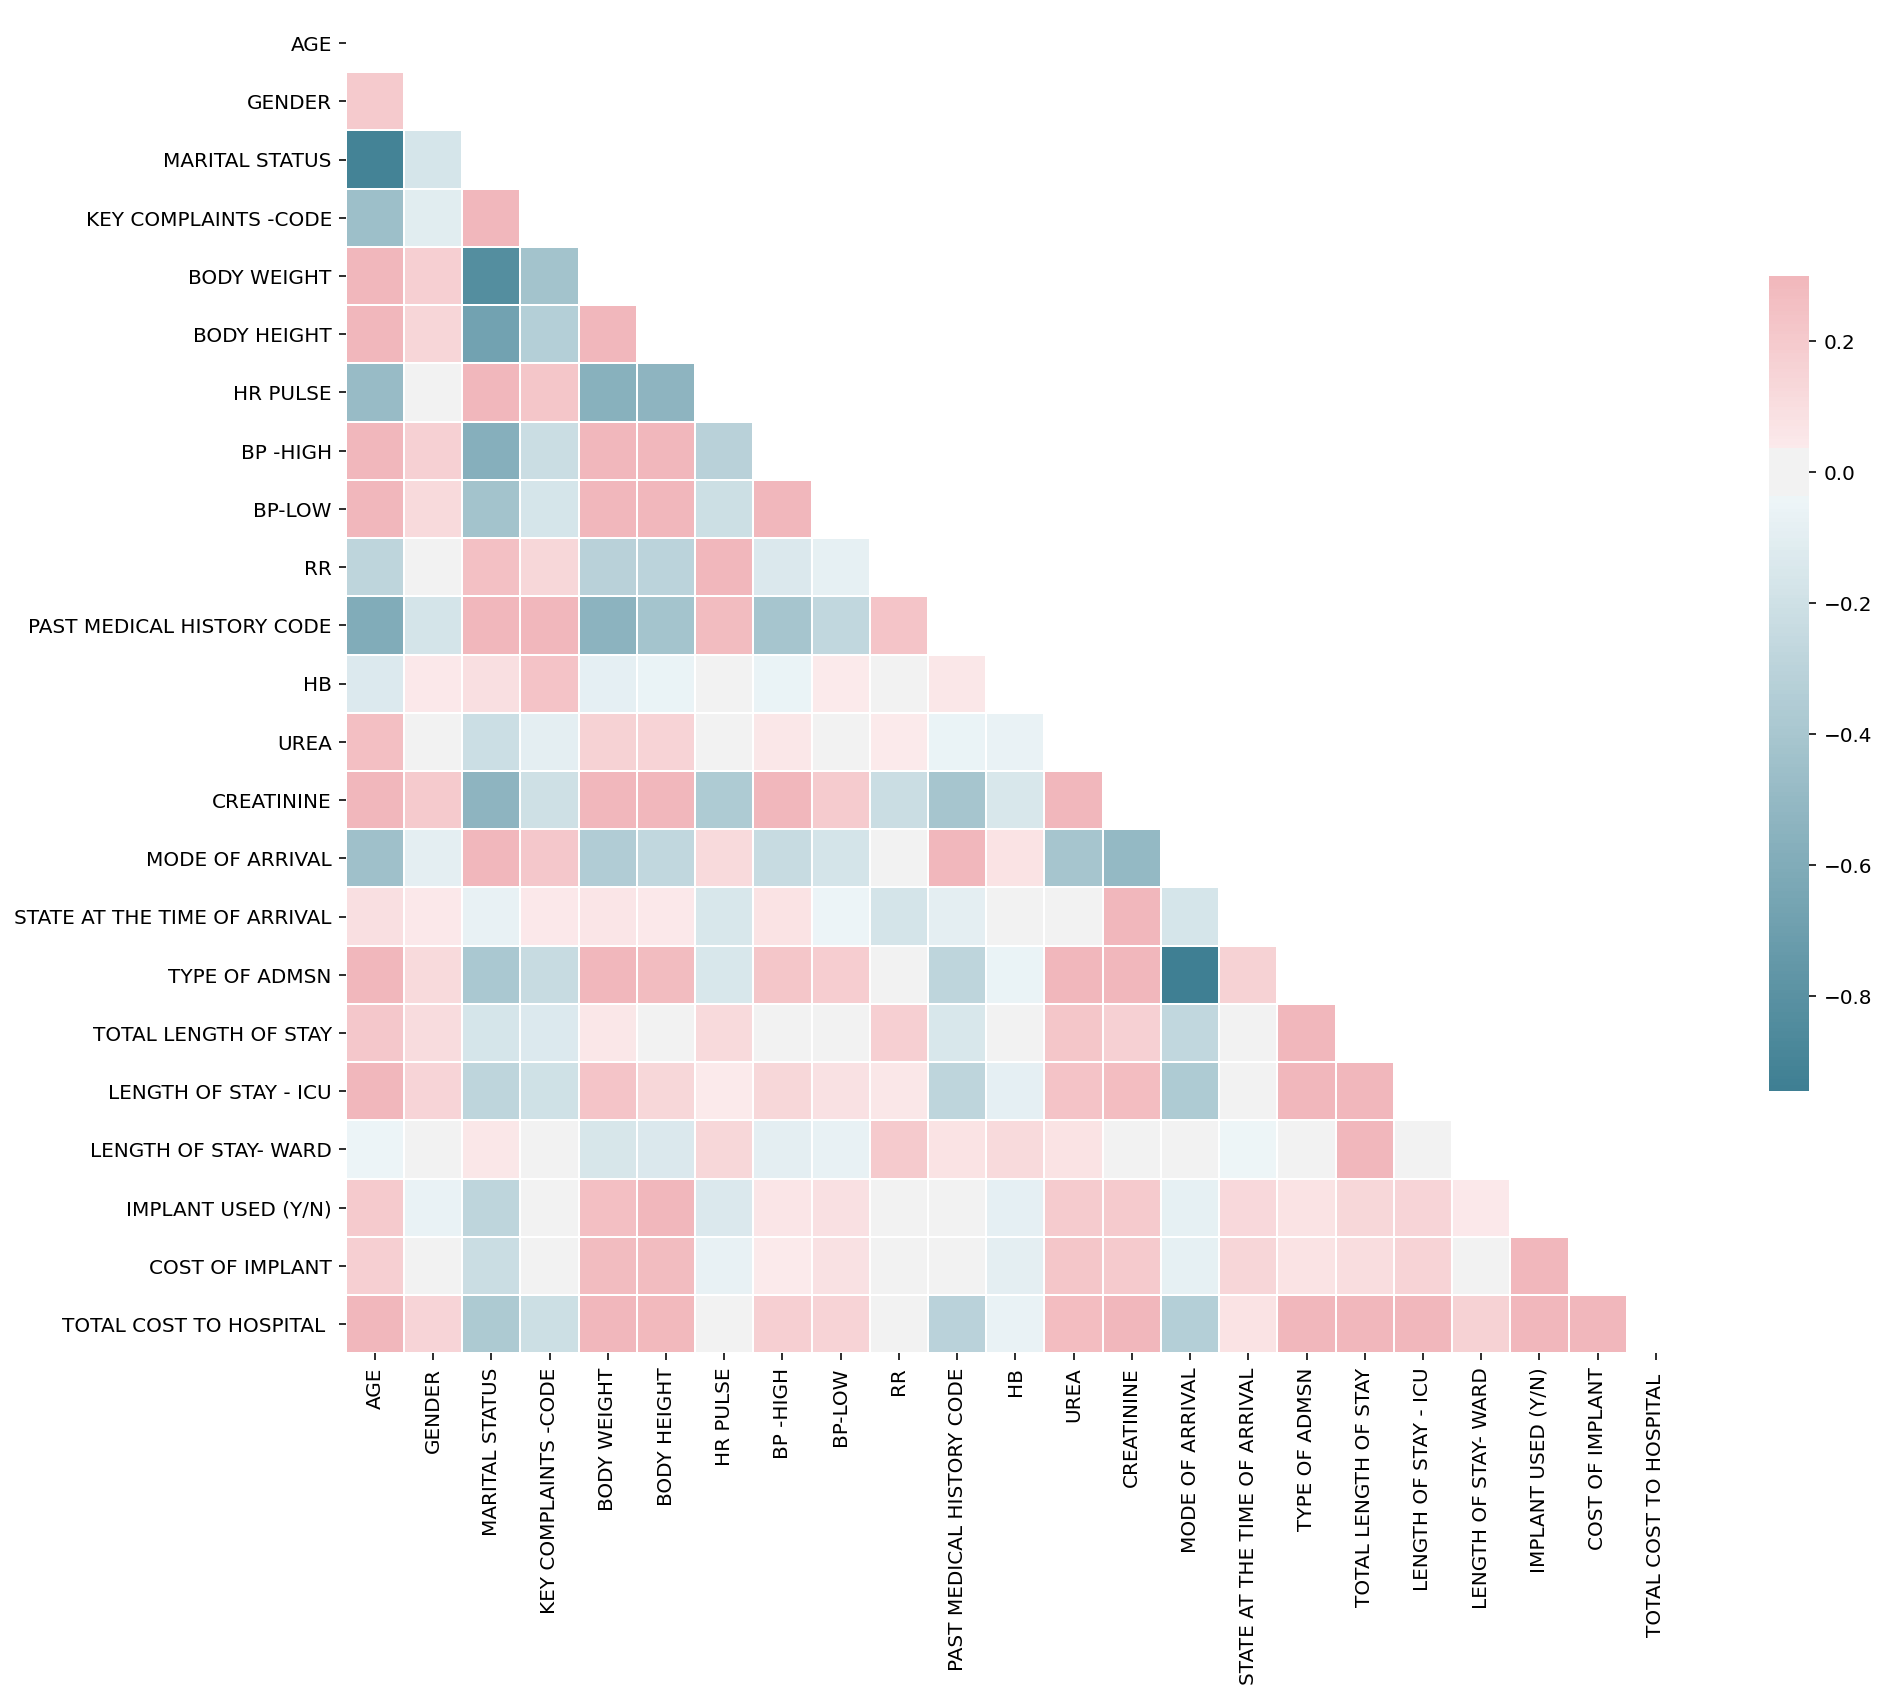

In [27]:
df_enc = copy.deepcopy(df)

for c in categorical_cols:
    le = preprocessing.LabelEncoder()
    df_enc[c] = le.fit_transform(df_enc[c])
    
plot_corr(df_enc)

#### Outlier in Categorical Data
There's only one record with the 'STATE AT THE TIME OF ARRIVAL' as 'CONFUSED', therefore not enough data for this caregory, and is very imbalanced. I think we're better off dropping this column from the data.

In [28]:
df = df.drop('STATE AT THE TIME OF ARRIVAL', axis=1)
df.head()

,AGE,GENDER,MARITAL STATUS,KEY COMPLAINTS -CODE,BODY WEIGHT,BODY HEIGHT,HR PULSE,BP -HIGH,BP-LOW,RR,PAST MEDICAL HISTORY CODE,HB,UREA,CREATININE,MODE OF ARRIVAL,TYPE OF ADMSN,TOTAL LENGTH OF STAY,LENGTH OF STAY - ICU,LENGTH OF STAY- WARD,IMPLANT USED (Y/N),COST OF IMPLANT,TOTAL COST TO HOSPITAL
SL.,,,,,,,,,,,,,,,,,,,,,,
1,58.0,M,MARRIED,other- heart,49.2,160,118,100.0,80.0,32,none,11.4,33.0,0.8,AMBULANCE,EMERGENCY,25,12,13,Y,38000,660293.0
2,59.0,M,MARRIED,CAD-DVD,41.0,155,78,70.0,50.0,28,none,11.4,95.0,1.7,AMBULANCE,EMERGENCY,41,20,21,Y,39690,809130.0
3,82.0,M,MARRIED,CAD-TVD,46.6,164,100,110.0,80.0,20,diabetes2,11.8,15.0,0.8,WALKED IN,ELECTIVE,18,9,9,N,0,362231.0
4,46.0,M,MARRIED,CAD-DVD,80.0,173,122,110.0,80.0,24,hypertension1,11.8,74.0,1.5,AMBULANCE,EMERGENCY,14,13,1,Y,89450,629990.0
5,60.0,M,MARRIED,CAD-DVD,58.0,175,72,180.0,100.0,18,diabetes2,10.0,48.0,1.9,AMBULANCE,EMERGENCY,24,12,12,N,0,444876.0


## Plotting the range of the target variable

We notice that the shape of the target variable (when sorted) resembles a "hockey stick", like an exponential curve, with a kink in the beginning (sub $100,000). This gives regressions a hard time in fitting the curve, and therefore it would be better if we operated on the log of the target variable

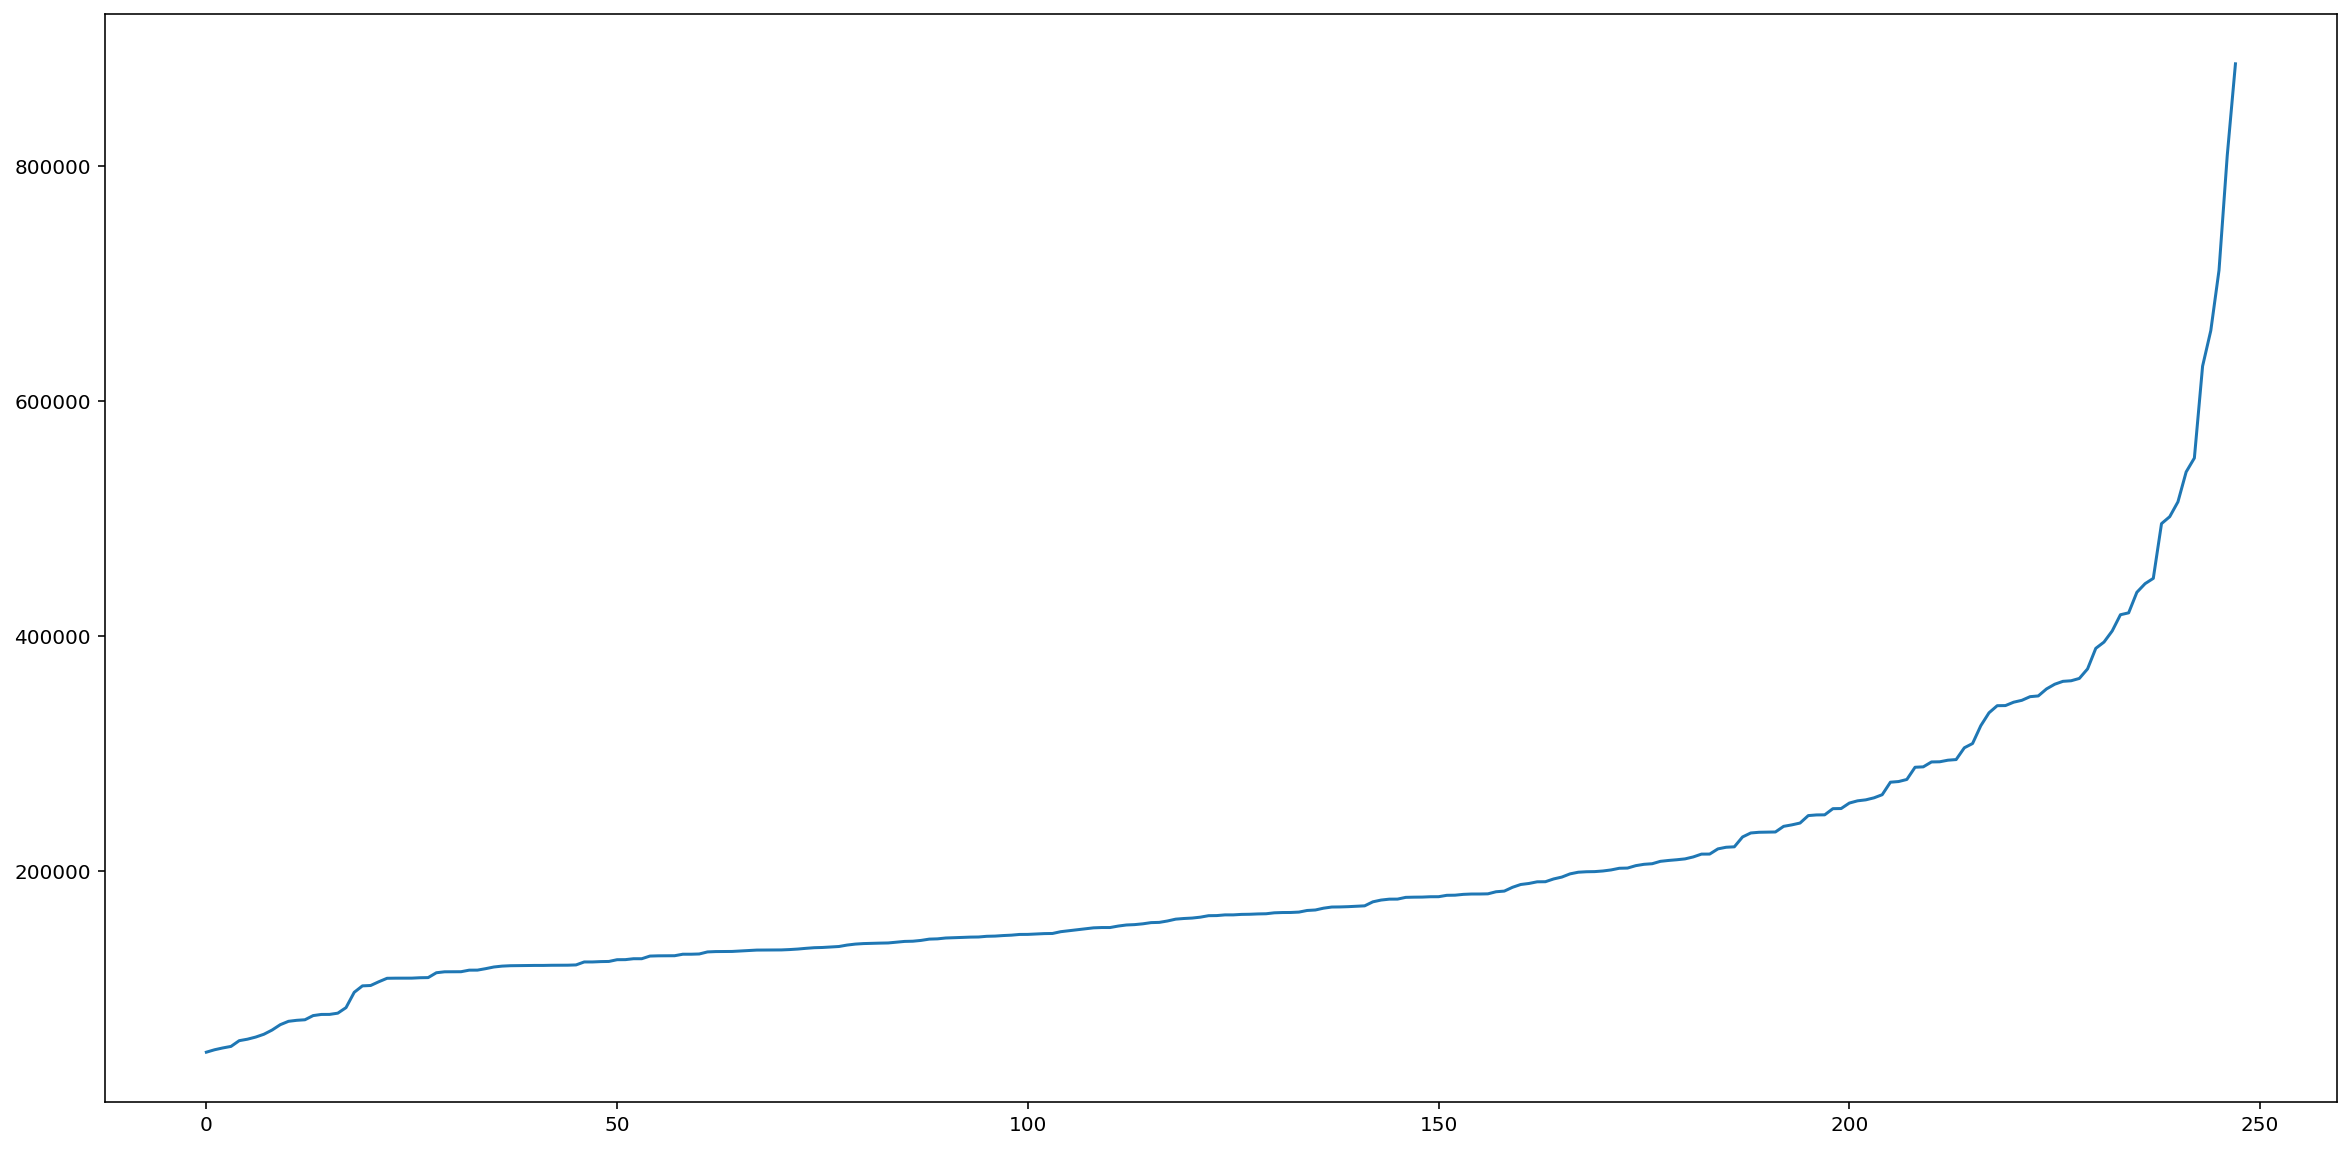

In [29]:
plt.figure(figsize=(20,10))
plt.plot(range(0, len(df)), df[[target_col]].sort_values(target_col) )


By taking the log, the curve is now smoother, and has a lesser range (between 11 and 13.6, rather than 50,000 and 880,000). It is now more linear, and regressions have a better chance fitting it. 

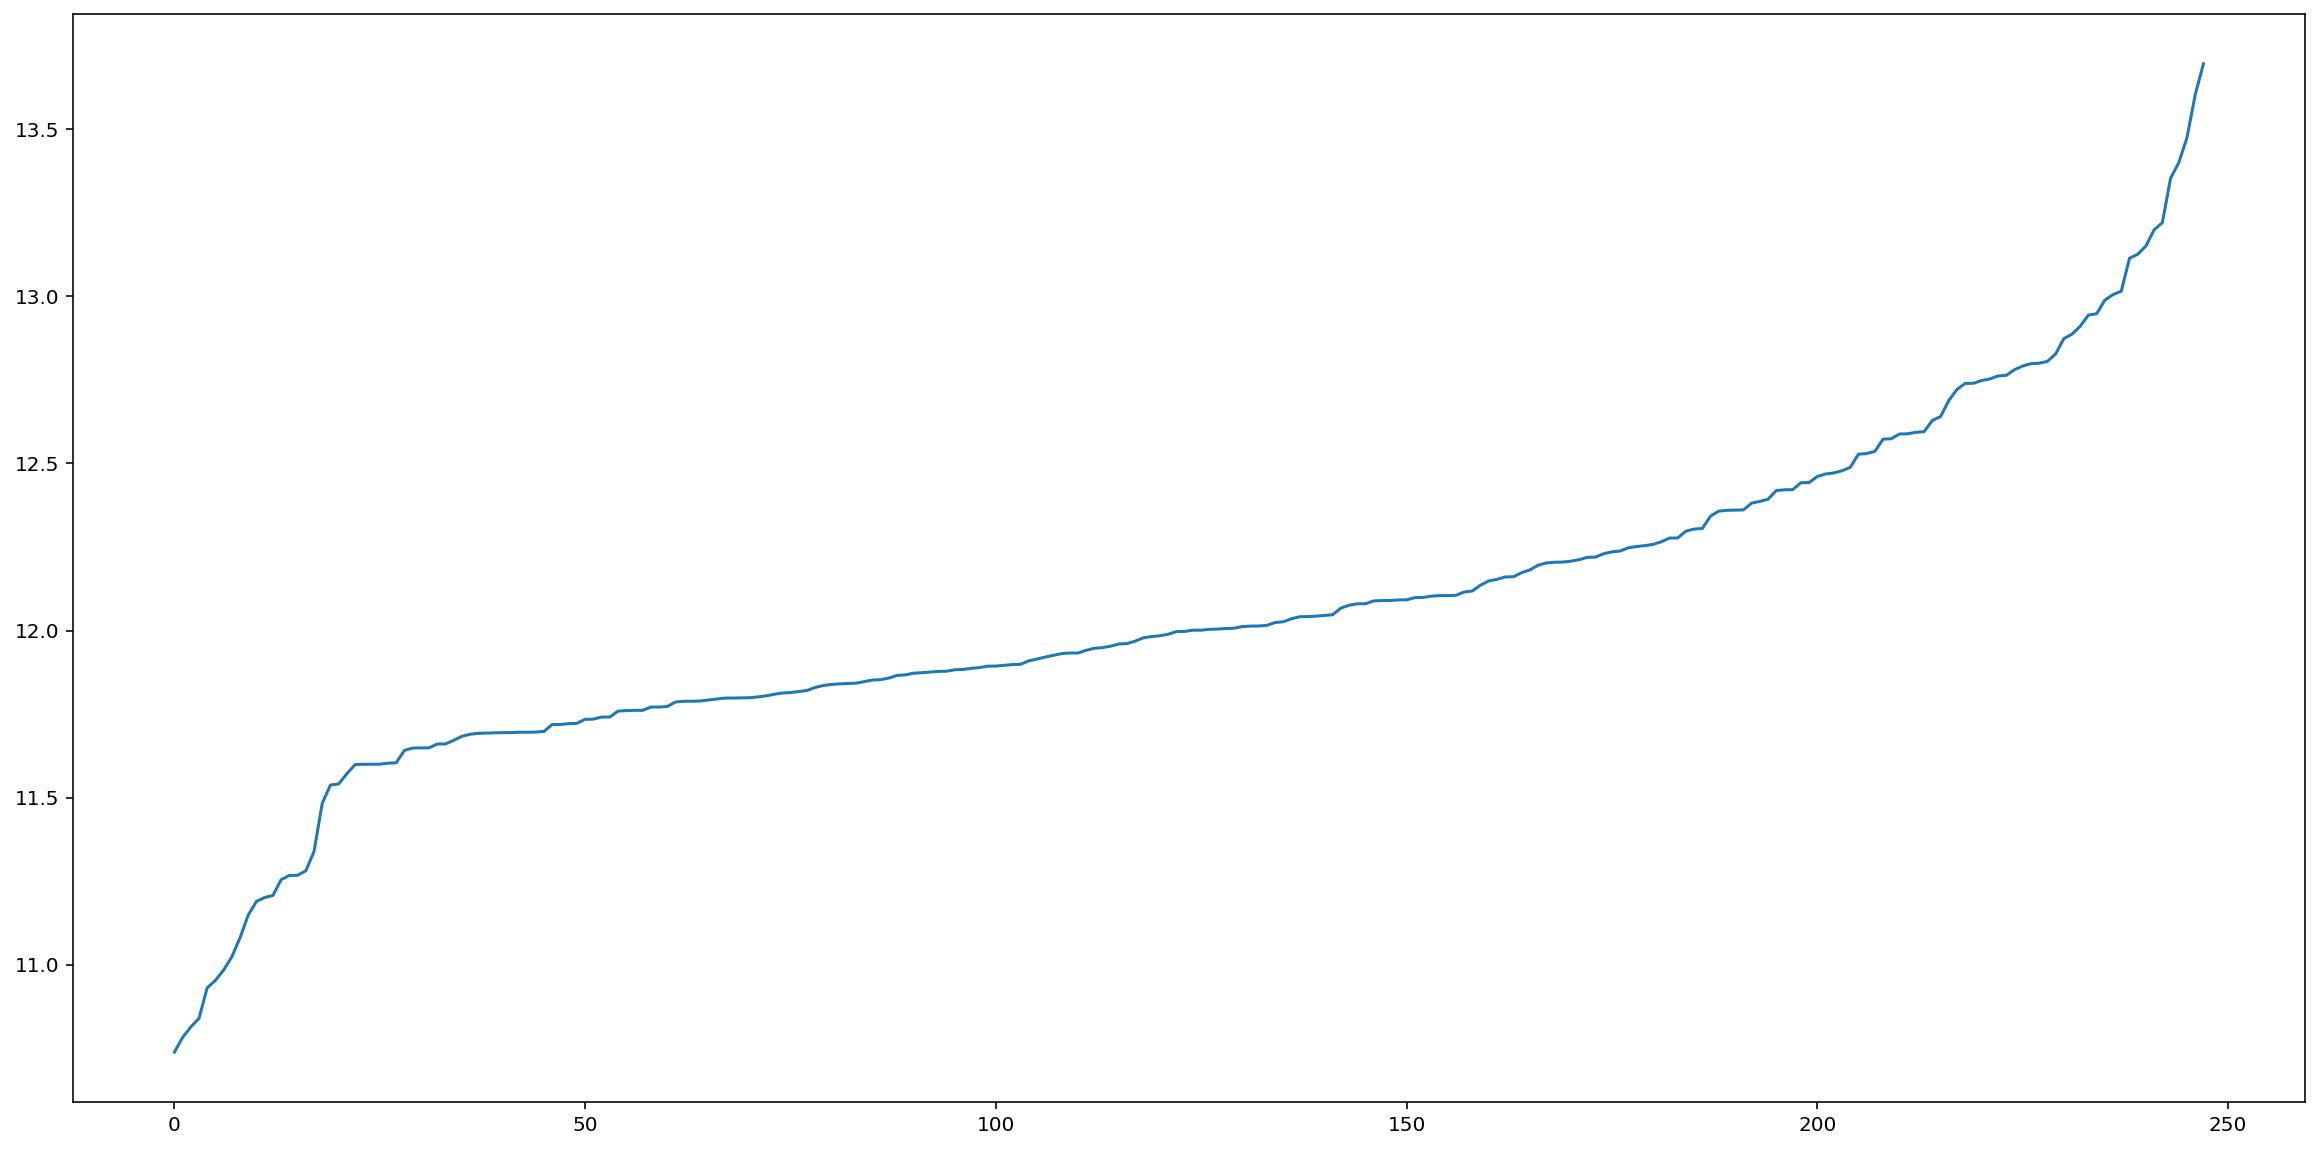

In [30]:
plt.figure(figsize=(20,10))
plt.plot(range(0, len(df)), np.log(df[[target_col]].sort_values(target_col)) )

In [31]:
df.shape

(248, 22)

In [32]:
df.to_csv('cleaned.csv')

### Preparing the data

Preparing the data for machine learning. Splitting the data into train and test data, binarizing all categorical columns, performing min-max on numerical columns, and adding a square of all predictor numerical columns. Since the target column still follows a "hockey stick" shape, even after the log, squaring predictor columns will provide better input, since now the regression can operate on polynomial-like inputs, e.g. a * x^2 + b * x + c


In [33]:
def data_prepare(df, add_squares=True, filter_outliers=True, 
                 lower_range=90000, higher_range=450000,
                 remove_num_cols = []):
    
    reduced_cat_cols = list(set(categorical_cols) - set(['STATE AT THE TIME OF ARRIVAL']))

    numerical_cols = ['AGE', 'BODY WEIGHT', 'BODY HEIGHT', 'HR PULSE', 'BP -HIGH', 'BP-LOW', 'RR', 'HB', 'UREA', 
                      'CREATININE', 'TOTAL LENGTH OF STAY', 'LENGTH OF STAY - ICU', 'LENGTH OF STAY- WARD', 
                      'COST OF IMPLANT']
    
    numerical_cols = list(set(numerical_cols) - set(remove_num_cols))
    
    temp_cols = []

    dfx = copy.deepcopy(df)

    if add_squares == True:
        for c in numerical_cols:
            dfx[c+'sq'] = dfx[c] * dfx[c]
            temp_cols.append(c+'sq')


    numerical_cols = numerical_cols + temp_cols
    predictors = reduced_cat_cols + numerical_cols

    if filter_outliers==True:
        dfx = dfx[dfx[target_col] <= higher_range]
        dfx = dfx[dfx[target_col] >= lower_range]

    df_train, df_test, y_train, y_test = train_test_split(dfx[predictors], dfx[target_col], 
                                                                test_size=0.2, random_state=42)

    X_train = np.zeros((df_train.shape[0],0))
    X_test = np.zeros((df_test.shape[0],0))    

    for c in reduced_cat_cols:
        labelBinarizer = LabelBinarizer()
        binCols = labelBinarizer.fit_transform(df_train[c])
        X_train = np.append(X_train, binCols, axis=1)
        binCols = labelBinarizer.transform(df_test[c])
        X_test = np.append(X_test, binCols, axis=1)


    min_max_scaler = MinMaxScaler()
    num_c = min_max_scaler.fit_transform(df_train[numerical_cols])
    X_train = np.append(X_train, num_c, axis=1)       
    num_c = min_max_scaler.transform(df_test[numerical_cols])
    X_test = np.append(X_test, num_c, axis=1)  
    
    return X_train, X_test, y_train, y_test


# Regression

## Training and Prediction

In here, and after multiple trials, I settled on a StackingRegressor, with member regressors of Random Forest, Extra Trees, Linear Regression, and XGBoot Regressor. The stacking of these regressors gives a really good performance. I'm tracking the R2 and Mean Squared Log Errors accuracy measures, to track performance.

I'm also using Grid Search, to look for the best combination of algorithm parameters, and to choose the best model. The plots are for the real test data (yellow), and the prediction using the test data inputs (blue).

### Target Variable Outliers


The target variable ranges from around 46,000 to 886,000. However, inspecting and visualizing the data, there are only 18 records below 90,000, and 9 records above 500,000. For the purpose of training the model, these could be considered as Outliers, and removed from the input training data, to improve the accuracy of prediction. 

This totally depends on the business case. If these values CANNOT be considered as outliers by the business case, then we do another regression training at the end of this notebook just for this.

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    5.3s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    8.2s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   14.3s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   19.3s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   30.6s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   38.6s
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:   48.5s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   57.0s
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:  2.0min
[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed:  2.3min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  2.7min
[Parallel(n_jobs=4)]: Done 173 tasks      | elapsed:  2.9min
[Parallel(

Round 1
For Hospital Cost Range of [ 150000 , 400000 ]
{'extra_trees__max_depth': 16, 'extra_trees__n_estimators': 100, 'rand_forest__max_depth': 12, 'rand_forest__n_estimators': 200, 'xgb__max_depth': 9, 'xgb__n_estimators': 400}
R2 Accuracy Score: 0.8160526489141195
MSLE Accuracy Score: 0.015400626263764872


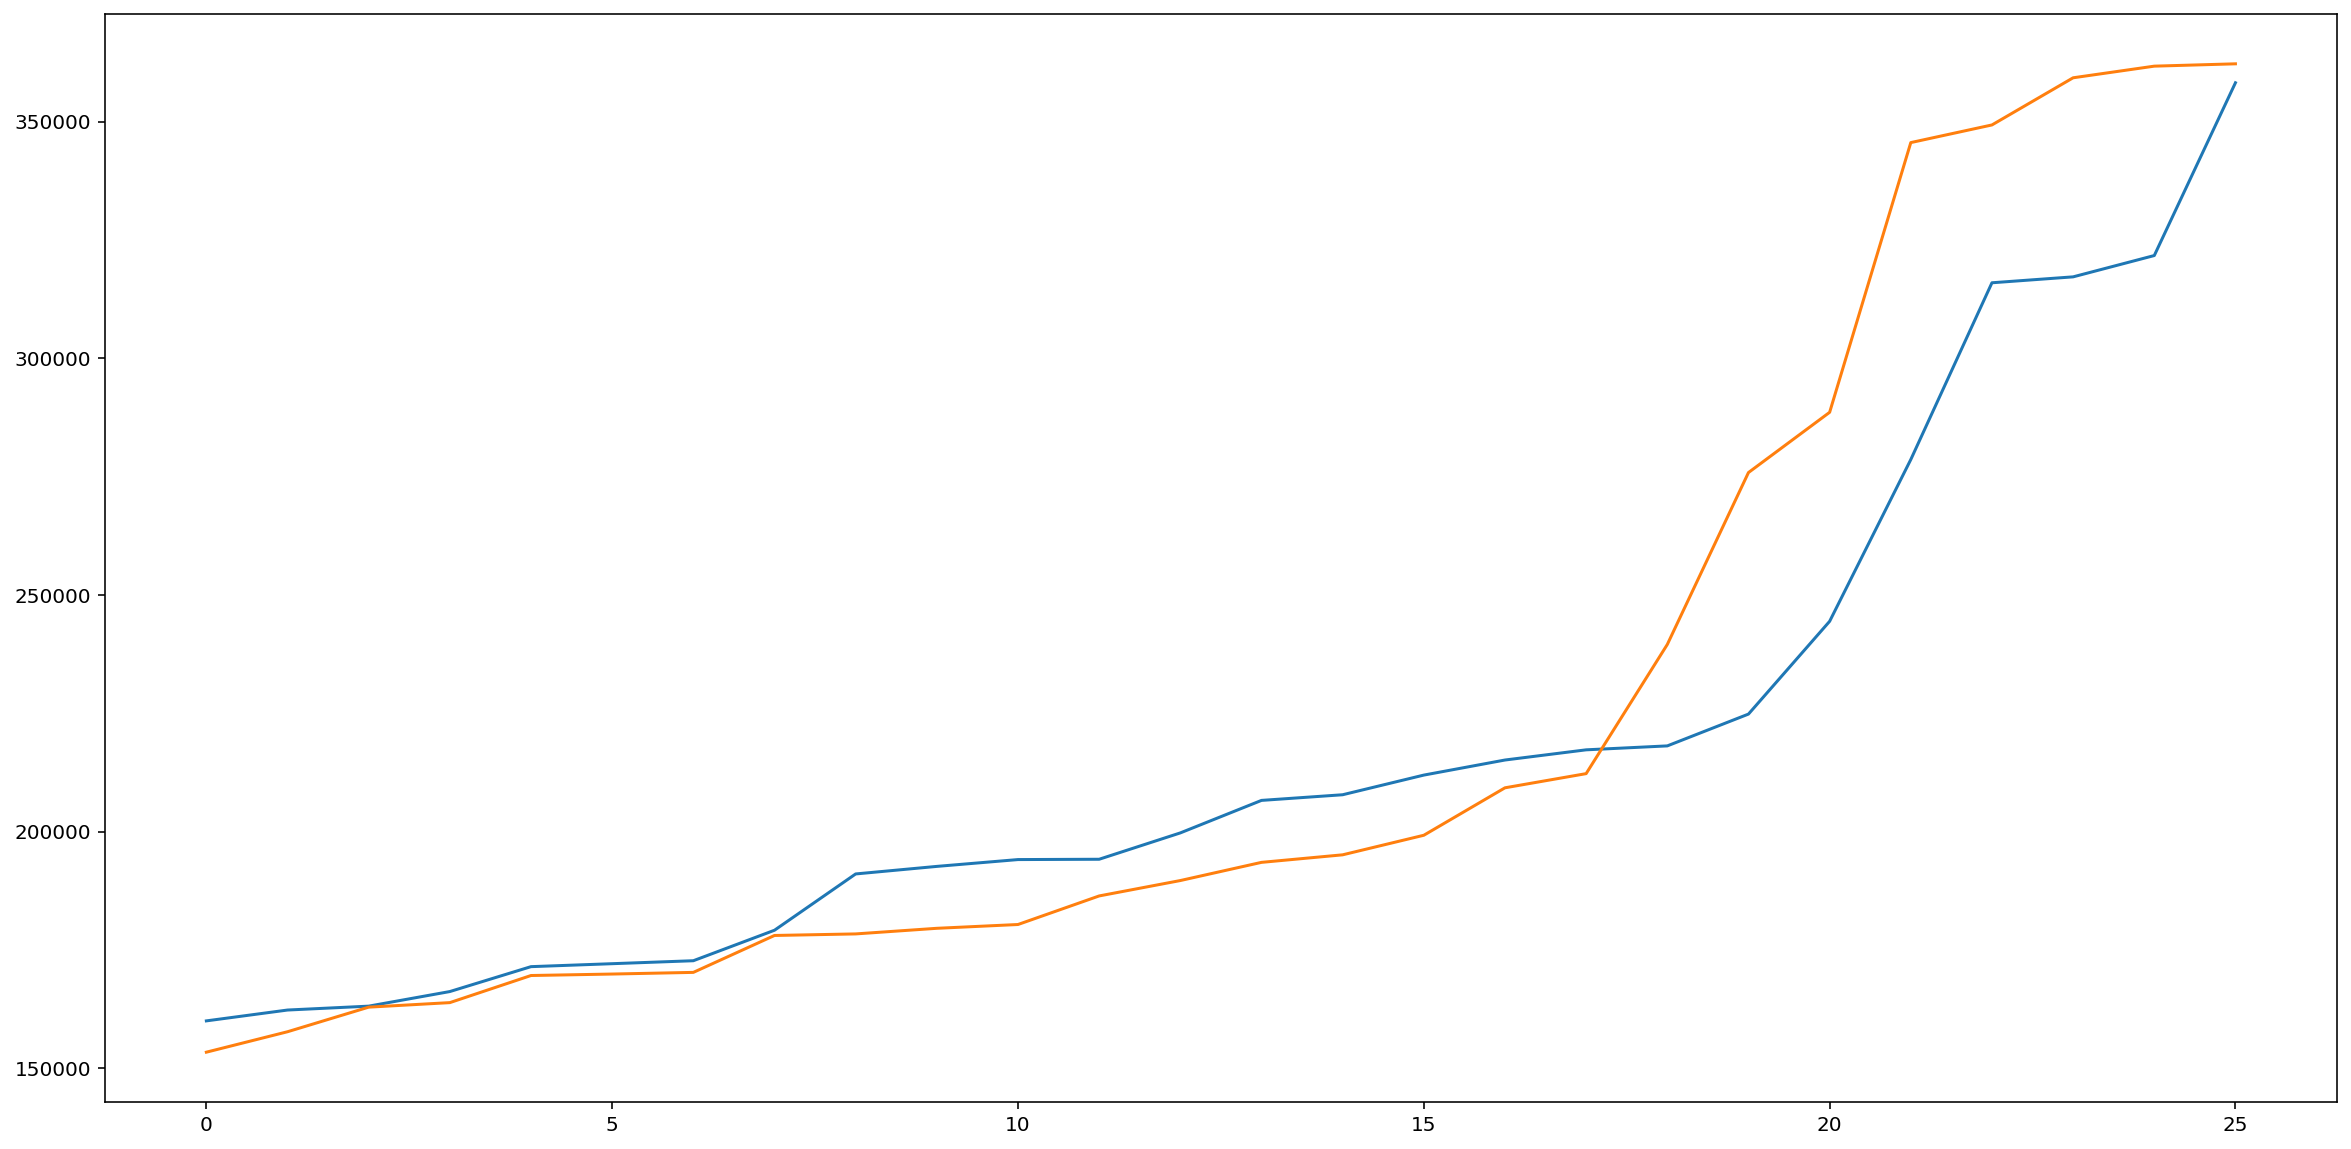



Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    4.6s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    7.7s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   13.2s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   17.6s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   29.1s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   35.9s
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:   44.4s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   52.7s
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:  1.9min
[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed:  2.2min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  2.5min
[Parallel(n_jobs=4)]: Done 173 tasks      | elapsed:  2.8min
[Parallel(

Round 2
For Hospital Cost Range of [ 140000 , 410000 ]
{'extra_trees__max_depth': 16, 'extra_trees__n_estimators': 200, 'rand_forest__max_depth': 9, 'rand_forest__n_estimators': 100, 'xgb__max_depth': 12, 'xgb__n_estimators': 600}
R2 Accuracy Score: 0.6719806614341464
MSLE Accuracy Score: 0.026774481548476906


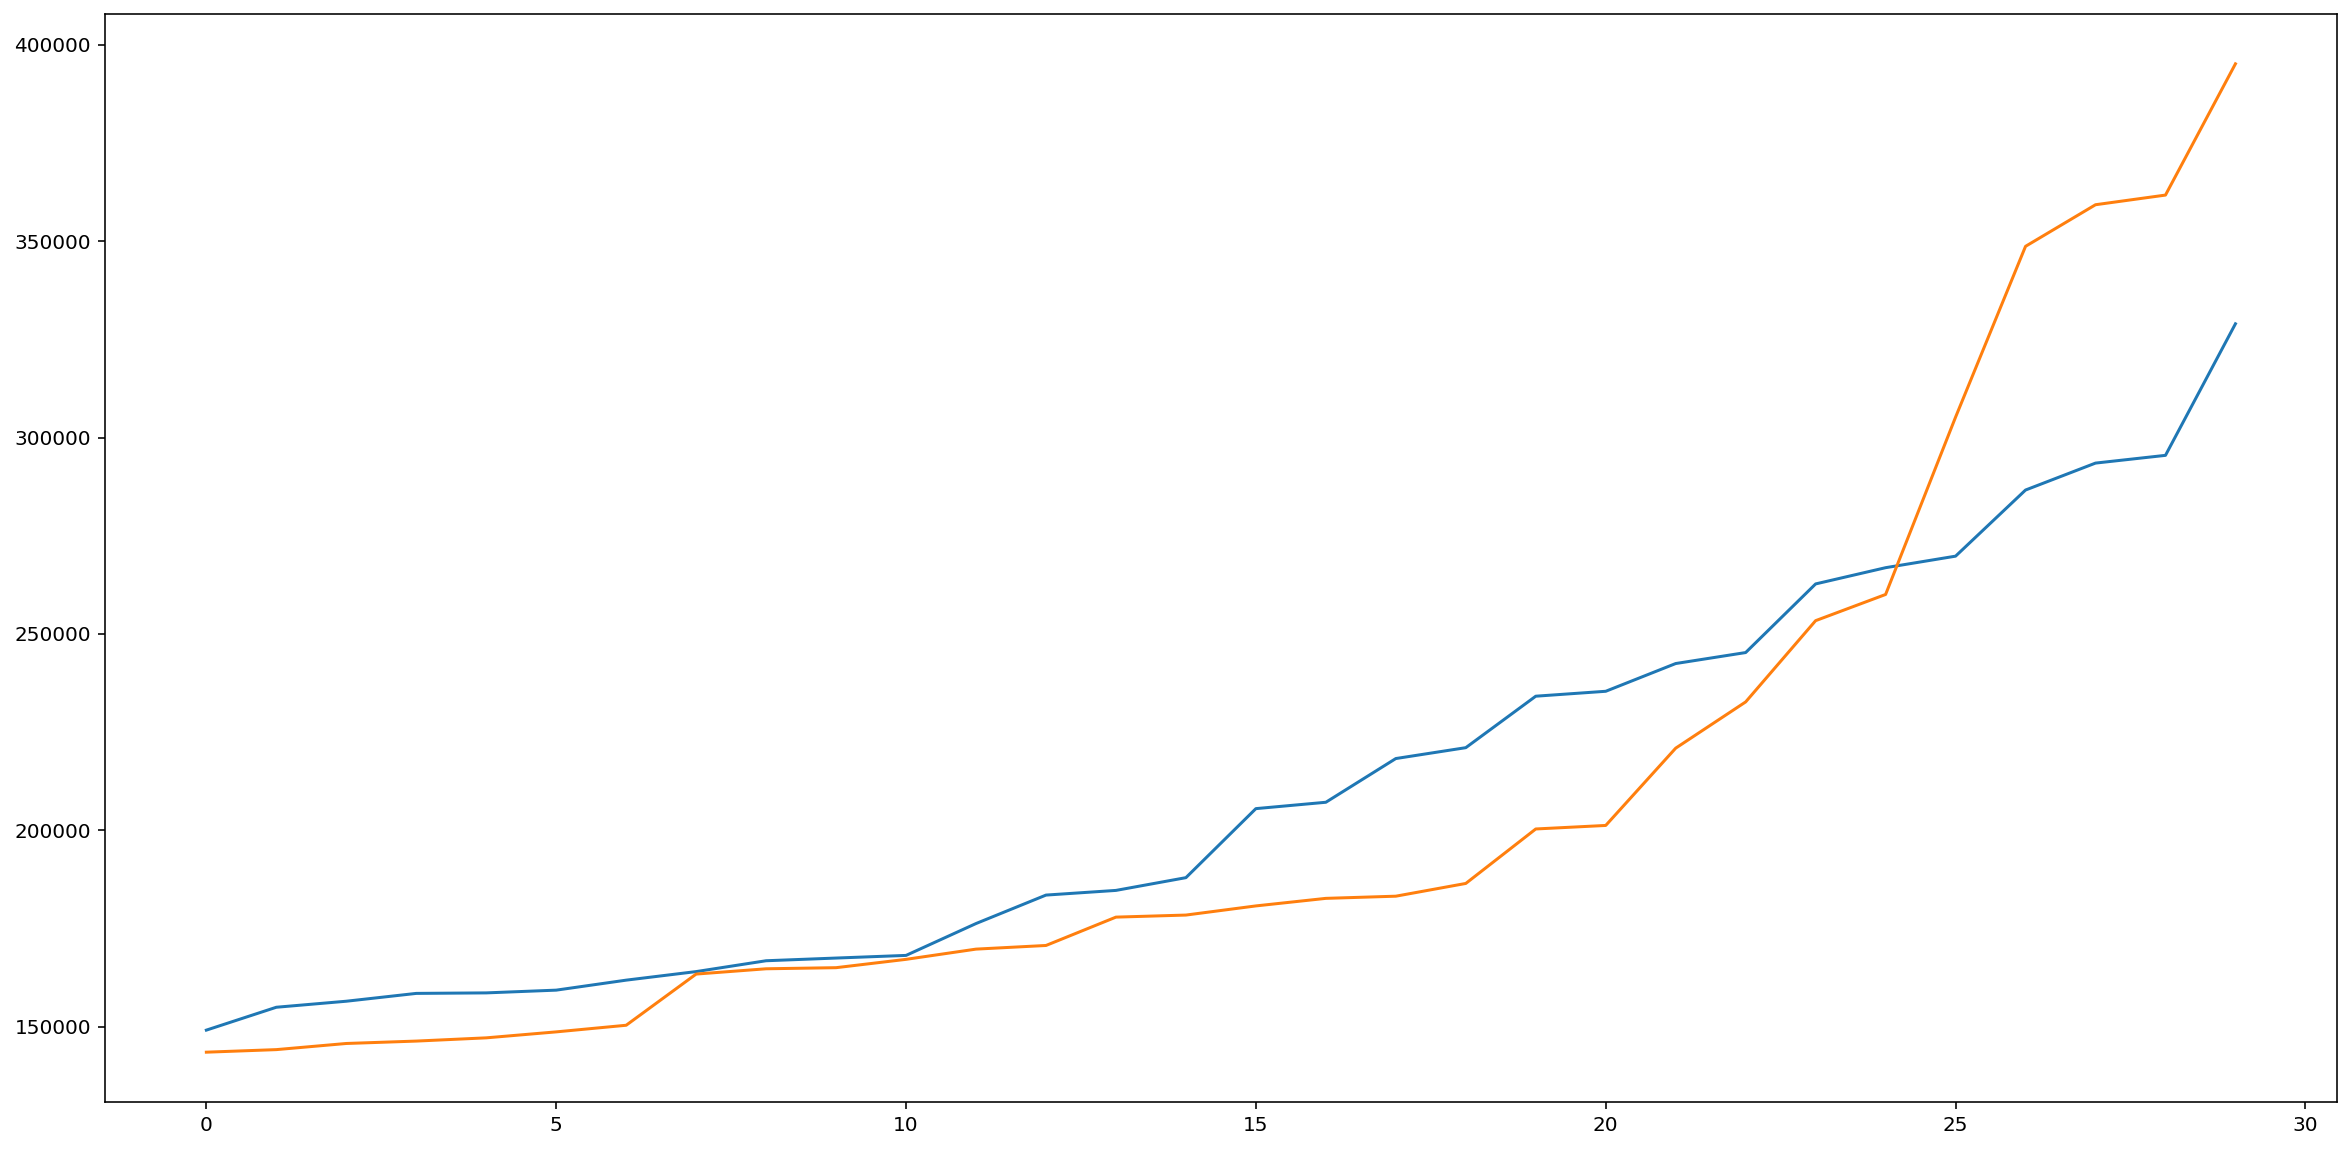



Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    7.7s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   14.1s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   24.8s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   34.3s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   54.9s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:  2.0min
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:  2.4min
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed:  2.8min
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:  3.4min
[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed:  3.9min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  4.5min
[Parallel(n_jobs=4)]: Done 173 tasks      | elapsed:  4.9min
[Parallel(

Round 3
For Hospital Cost Range of [ 130000 , 420000 ]
{'extra_trees__max_depth': 16, 'extra_trees__n_estimators': 200, 'rand_forest__max_depth': 12, 'rand_forest__n_estimators': 200, 'xgb__max_depth': 9, 'xgb__n_estimators': 600}
R2 Accuracy Score: 0.7671269462325222
MSLE Accuracy Score: 0.01695193859723626


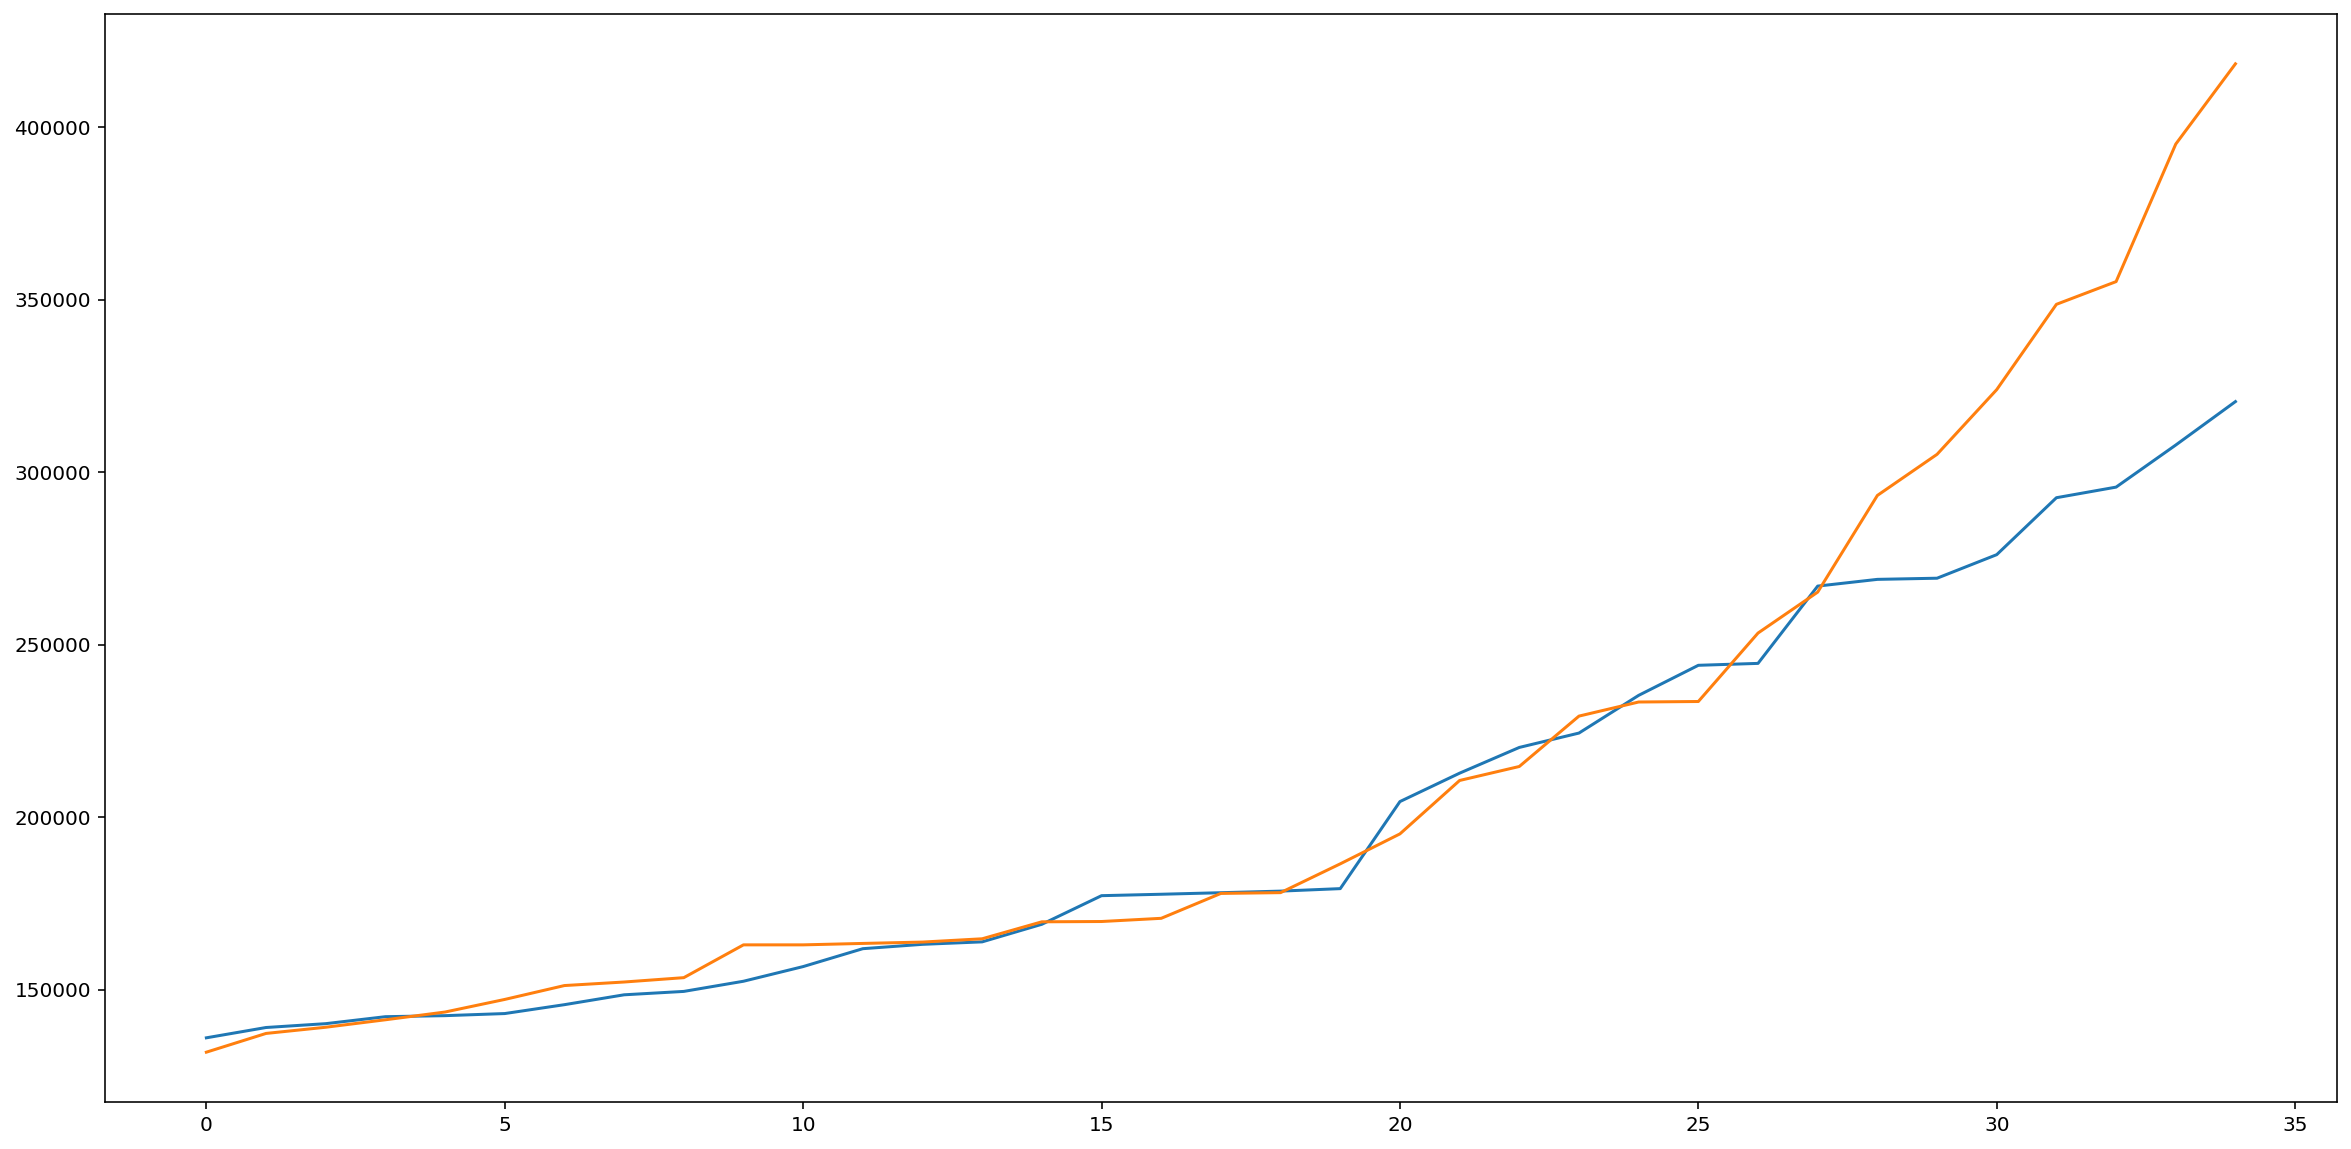



Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    8.3s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   13.5s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   23.2s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   31.4s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   53.9s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:  2.1min
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:  2.6min
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed:  3.1min
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:  3.6min
[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed:  4.0min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  4.6min
[Parallel(n_jobs=4)]: Done 173 tasks      | elapsed:  5.1min
[Parallel(

Round 4
For Hospital Cost Range of [ 120000 , 430000 ]
{'extra_trees__max_depth': 25, 'extra_trees__n_estimators': 100, 'rand_forest__max_depth': 12, 'rand_forest__n_estimators': 100, 'xgb__max_depth': 9, 'xgb__n_estimators': 600}
R2 Accuracy Score: 0.7657133544853764
MSLE Accuracy Score: 0.016082260939860416


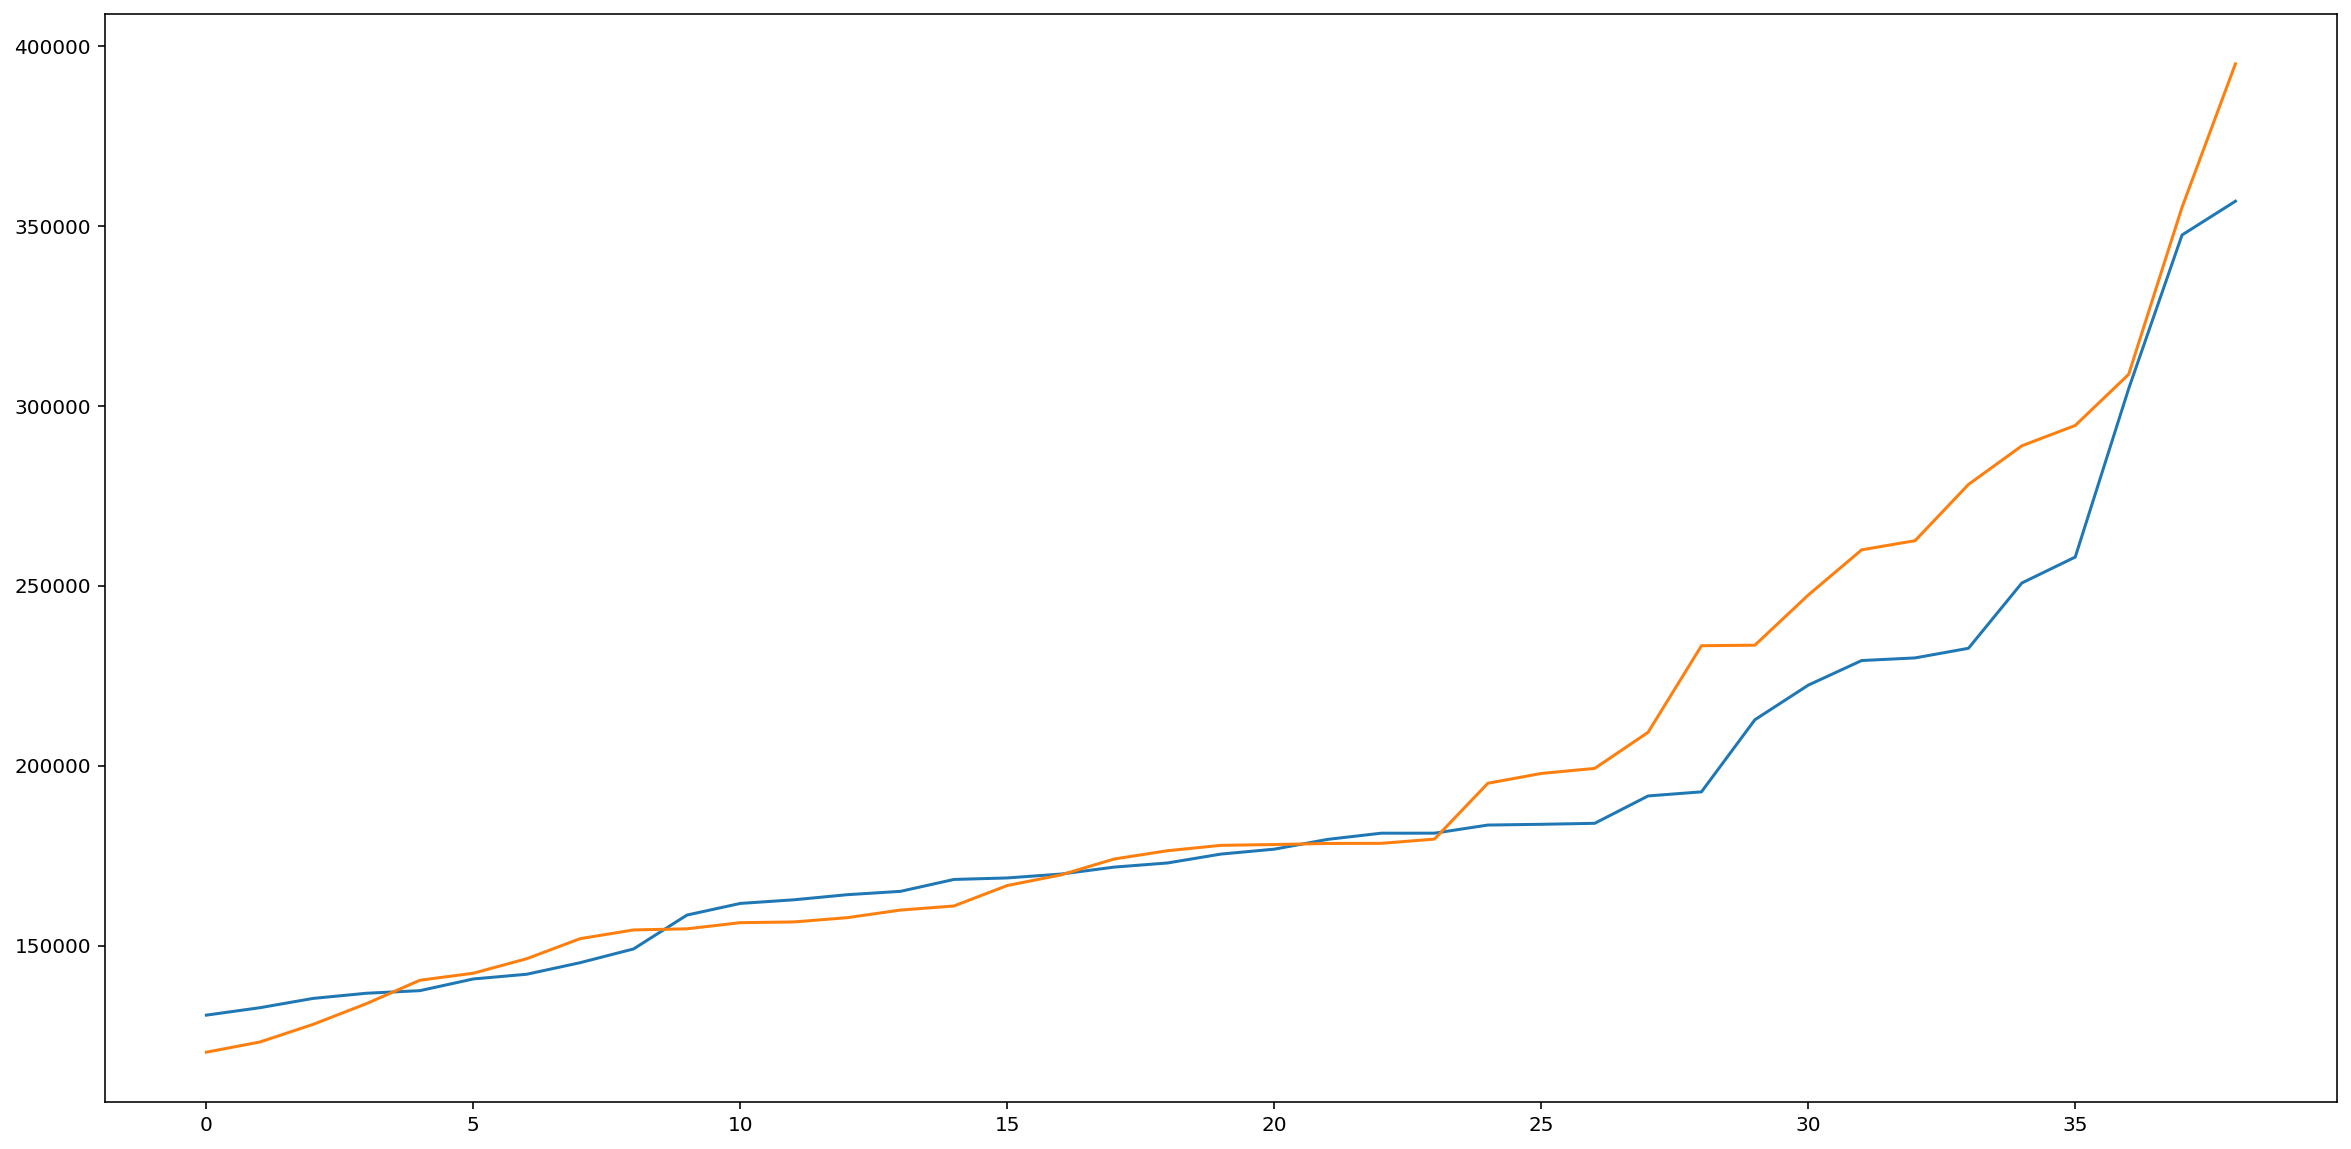



Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   12.1s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   18.2s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   30.1s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   40.9s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:  2.0min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  2.3min
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:  2.8min
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:  3.2min
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed:  3.8min
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:  4.6min
[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed:  5.1min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  6.0min
[Parallel(n_jobs=4)]: Done 173 tasks      | elapsed:  6.5min
[Parallel(

Round 5
For Hospital Cost Range of [ 110000 , 440000 ]
{'extra_trees__max_depth': 25, 'extra_trees__n_estimators': 100, 'rand_forest__max_depth': 9, 'rand_forest__n_estimators': 100, 'xgb__max_depth': 12, 'xgb__n_estimators': 600}
R2 Accuracy Score: 0.8256945140065104
MSLE Accuracy Score: 0.016567384725996722


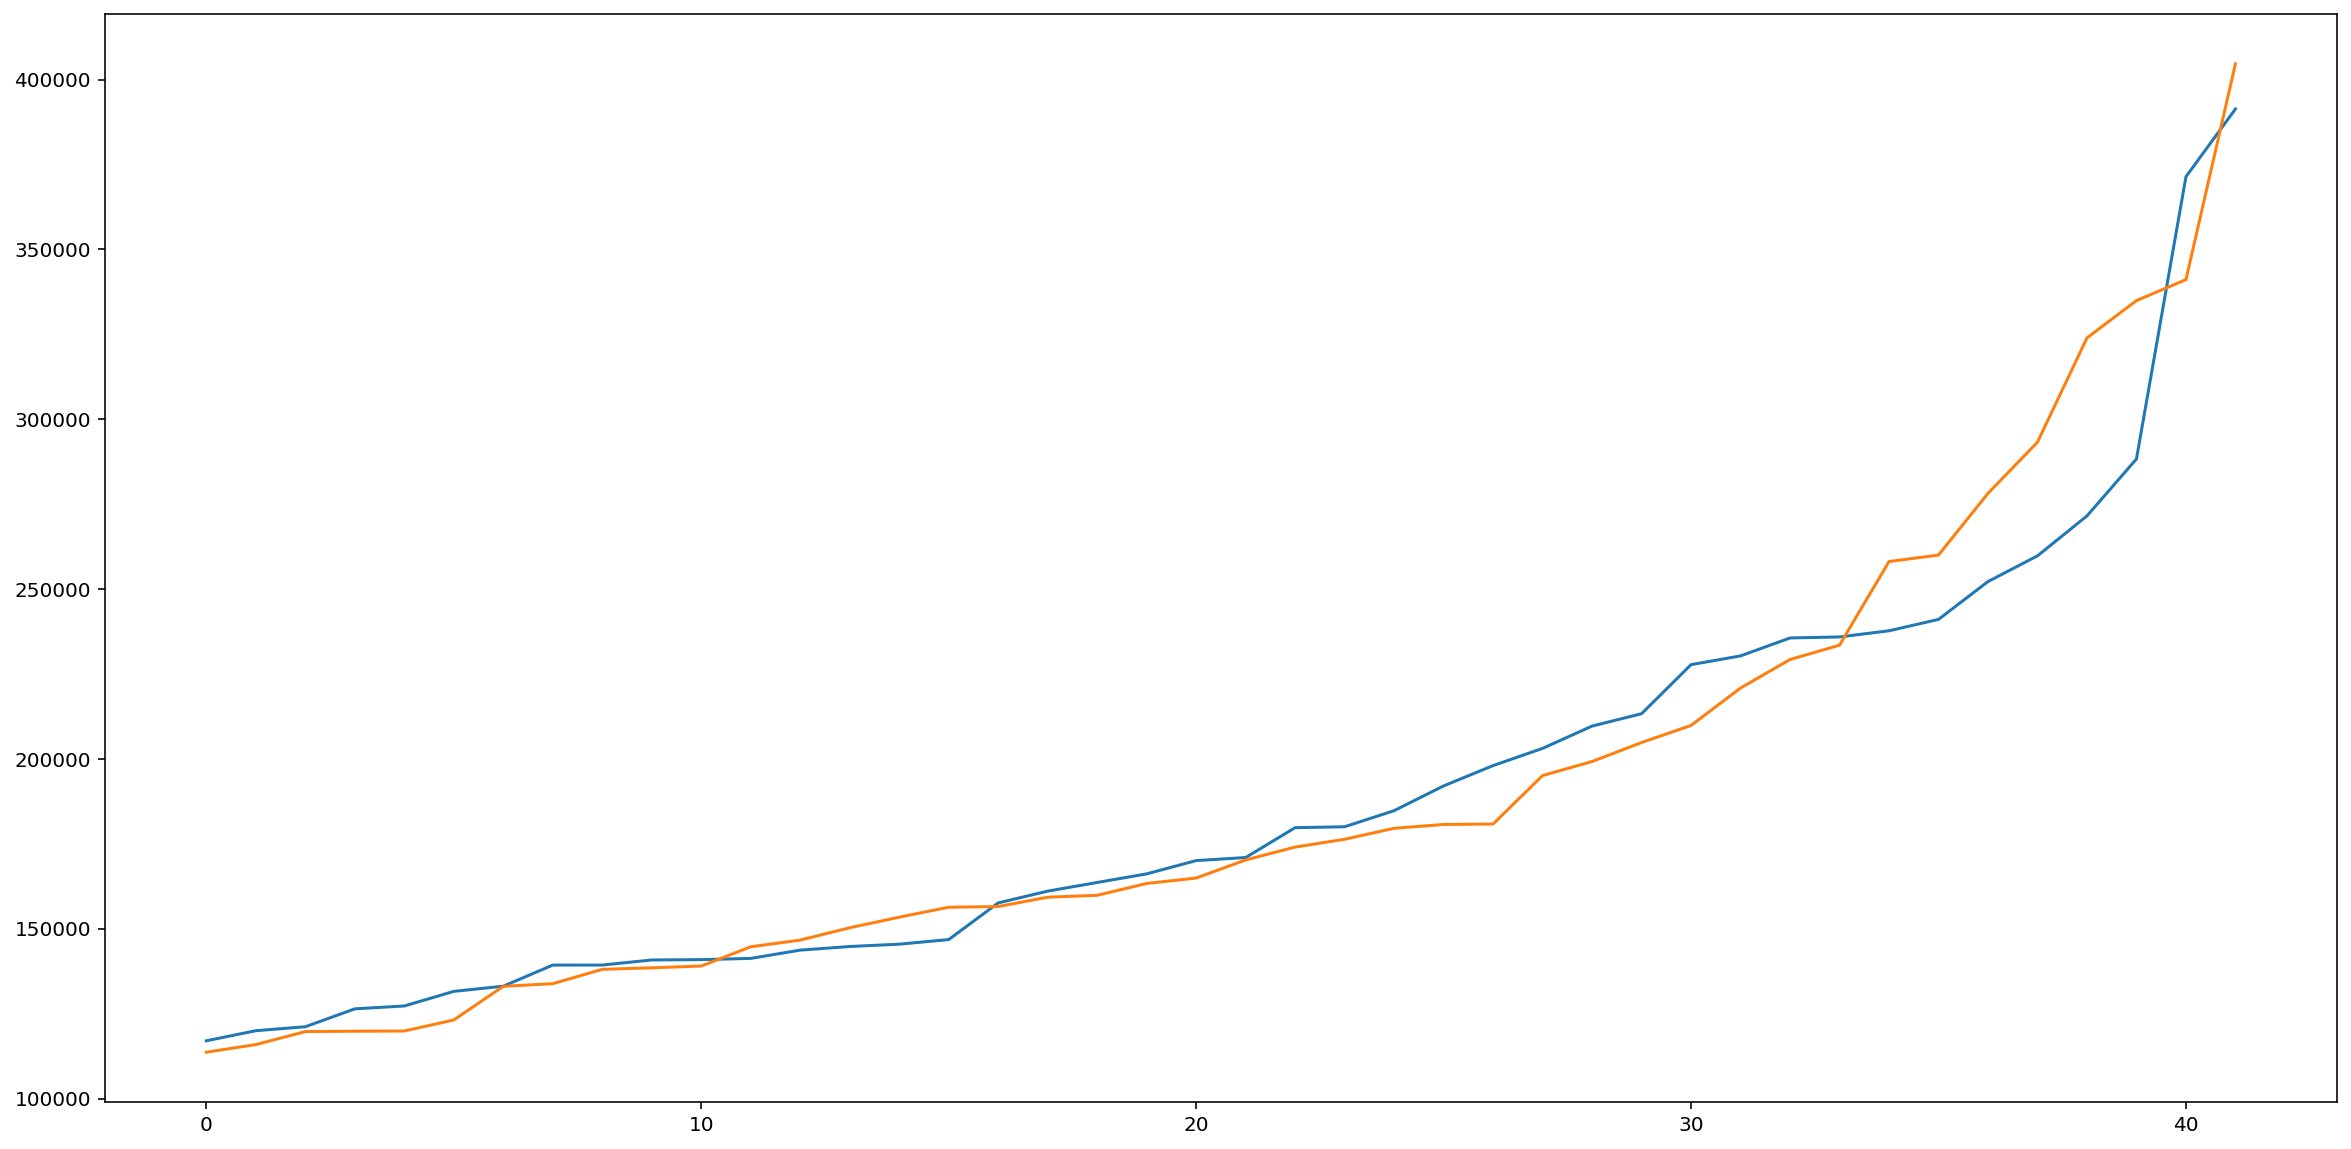



Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    8.4s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   15.0s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   26.5s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   35.8s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   58.4s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:  2.1min
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:  2.6min
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed:  3.2min
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:  4.0min
[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed:  4.7min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  5.5min
[Parallel(n_jobs=4)]: Done 173 tasks      | elapsed:  6.1min
[Parallel(

Round 6
For Hospital Cost Range of [ 100000 , 450000 ]
{'extra_trees__max_depth': 25, 'extra_trees__n_estimators': 100, 'rand_forest__max_depth': 12, 'rand_forest__n_estimators': 200, 'xgb__max_depth': 9, 'xgb__n_estimators': 600}
R2 Accuracy Score: 0.8566121553081357
MSLE Accuracy Score: 0.01591664241459498


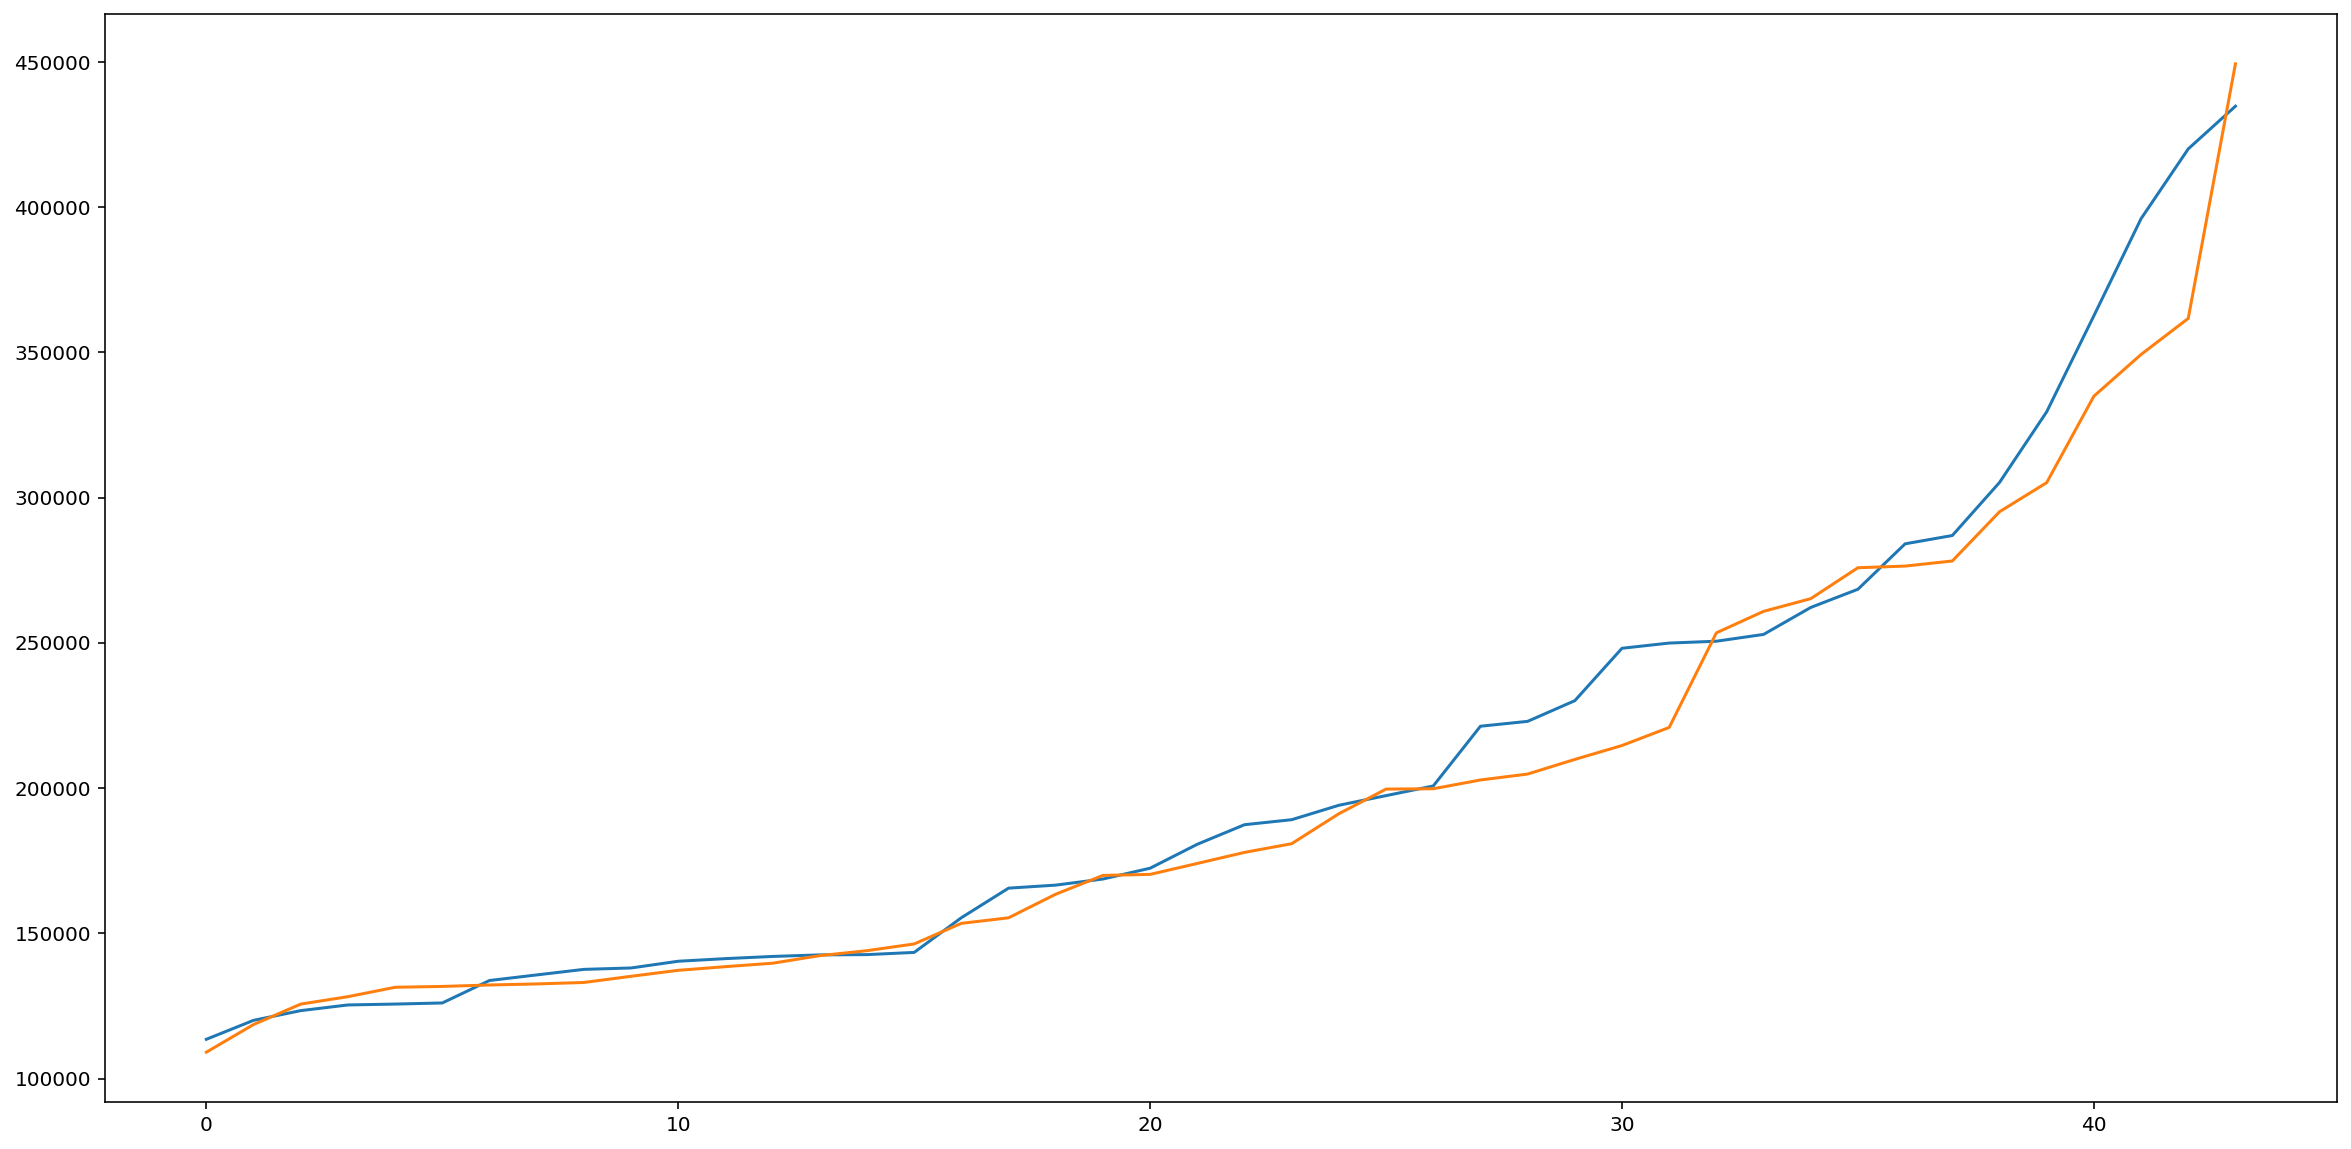



Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   13.2s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   22.4s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   36.8s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   48.9s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  2.1min
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:  2.6min
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:  3.1min
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed:  3.7min
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:  4.3min
[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed:  5.0min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  5.6min
[Parallel(n_jobs=4)]: Done 173 tasks      | elapsed:  6.1min
[Parallel(

Round 7
For Hospital Cost Range of [ 90000 , 460000 ]
{'extra_trees__max_depth': 25, 'extra_trees__n_estimators': 100, 'rand_forest__max_depth': 12, 'rand_forest__n_estimators': 100, 'xgb__max_depth': 12, 'xgb__n_estimators': 600}
R2 Accuracy Score: 0.9179251420280404
MSLE Accuracy Score: 0.015499037917375768


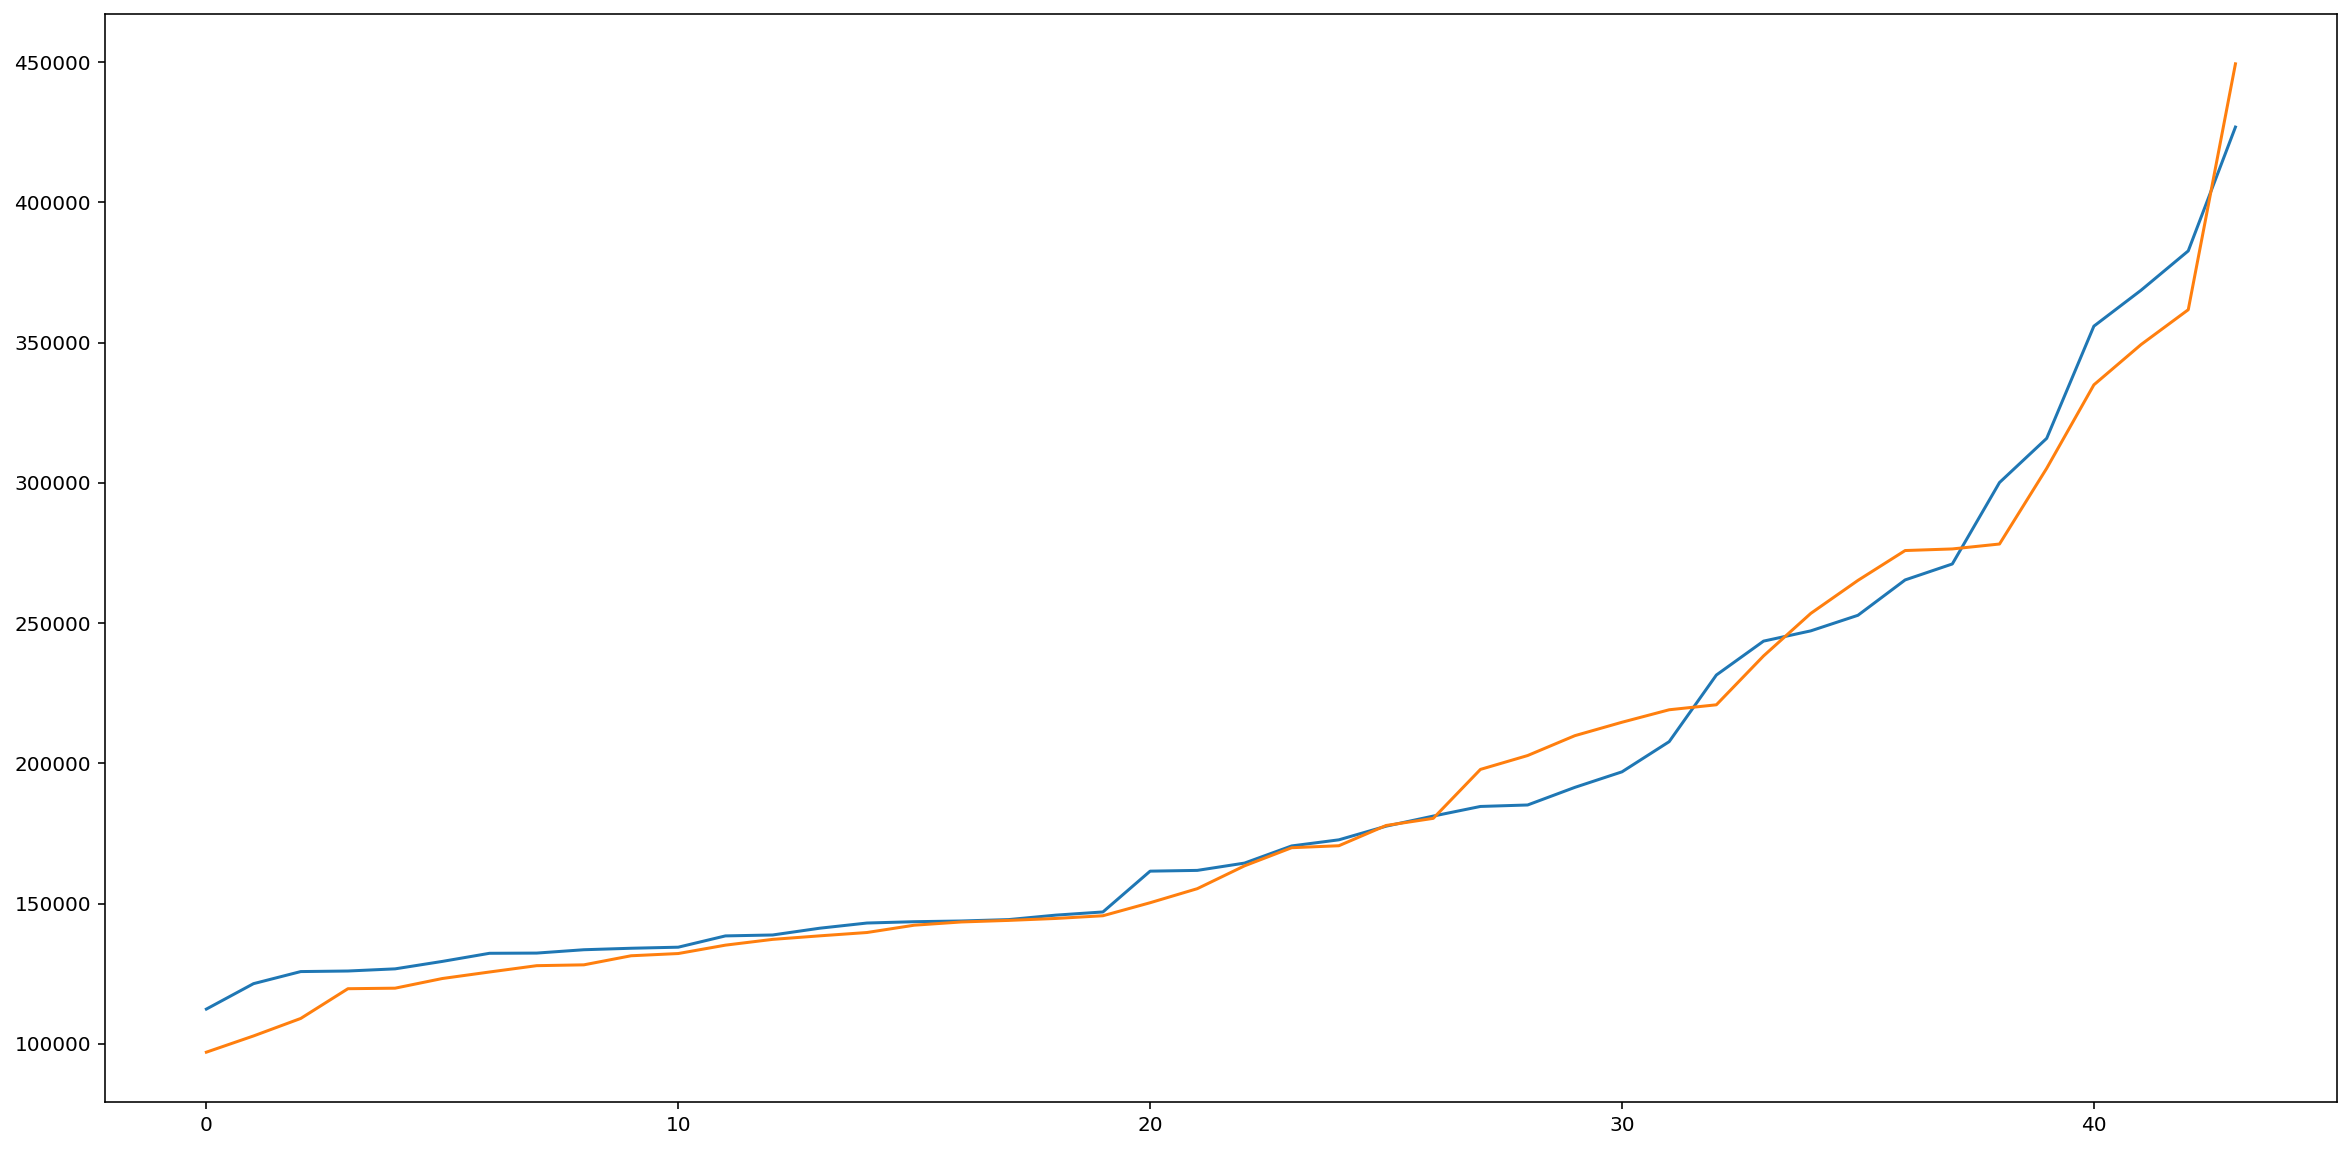



Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    9.2s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   15.4s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   27.4s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   37.5s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  2.2min
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:  2.8min
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:  3.2min
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed:  3.9min
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:  4.6min
[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed:  5.1min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  6.0min
[Parallel(n_jobs=4)]: Done 173 tasks      | elapsed:  6.4min
[Parallel(

Round 8
For Hospital Cost Range of [ 80000 , 470000 ]
{'extra_trees__max_depth': 25, 'extra_trees__n_estimators': 200, 'rand_forest__max_depth': 12, 'rand_forest__n_estimators': 100, 'xgb__max_depth': 9, 'xgb__n_estimators': 400}
R2 Accuracy Score: 0.8488050510039987
MSLE Accuracy Score: 0.022423653736292133


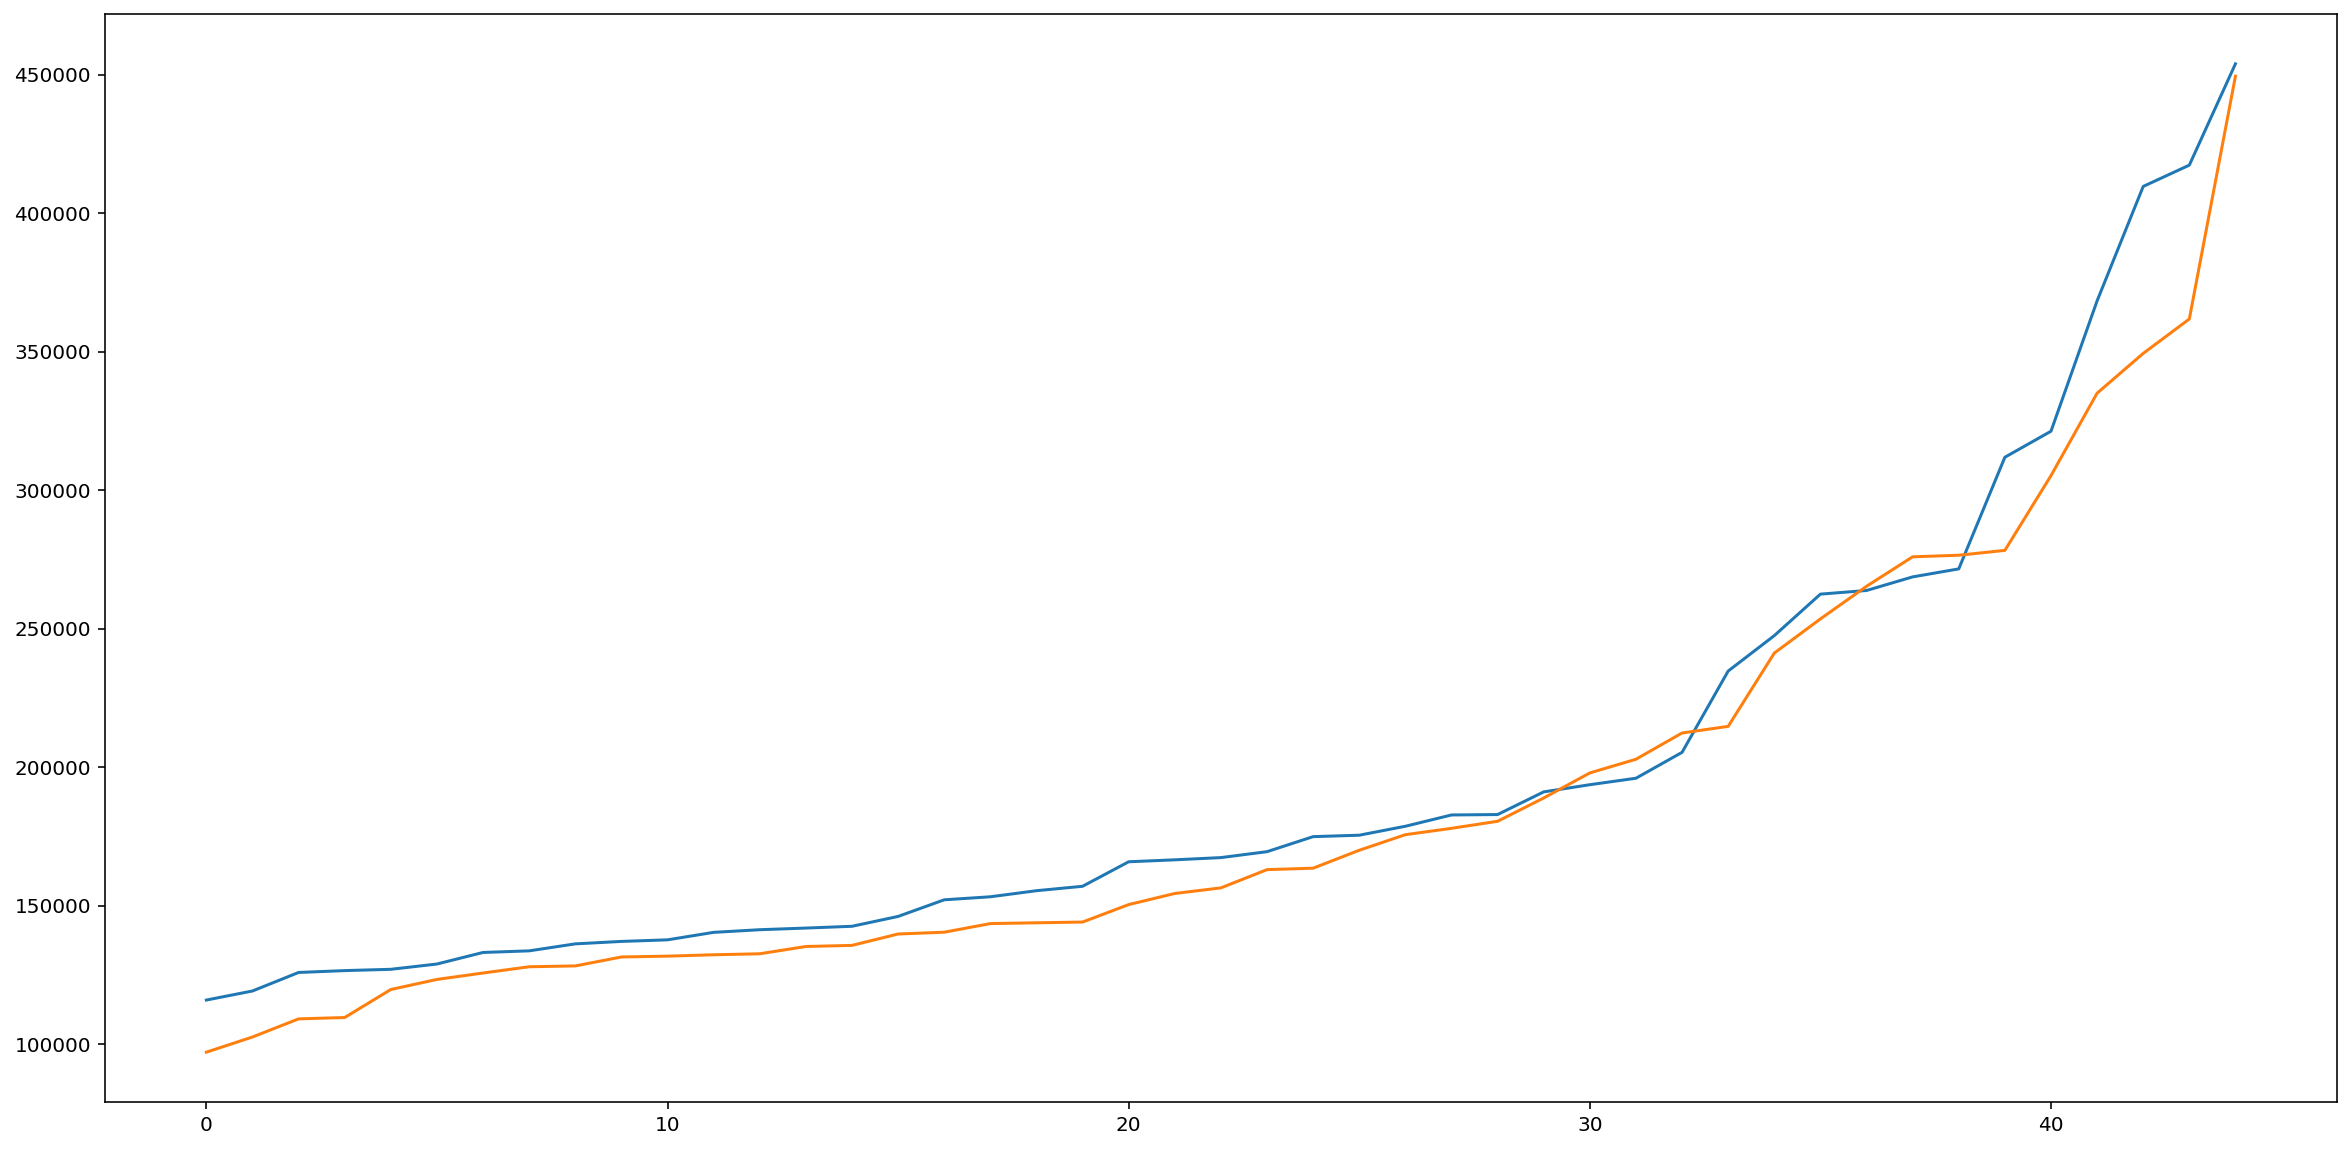



Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    6.4s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   10.8s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   19.1s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   26.4s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   42.2s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   52.3s
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:  1.9min
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed:  2.4min
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:  2.9min
[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed:  3.3min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  3.9min
[Parallel(n_jobs=4)]: Done 173 tasks      | elapsed:  4.3min
[Parallel(

Round 9
For Hospital Cost Range of [ 70000 , 480000 ]
{'extra_trees__max_depth': 25, 'extra_trees__n_estimators': 100, 'rand_forest__max_depth': 12, 'rand_forest__n_estimators': 200, 'xgb__max_depth': 12, 'xgb__n_estimators': 600}
R2 Accuracy Score: 0.8143387339325779
MSLE Accuracy Score: 0.02178475241890849


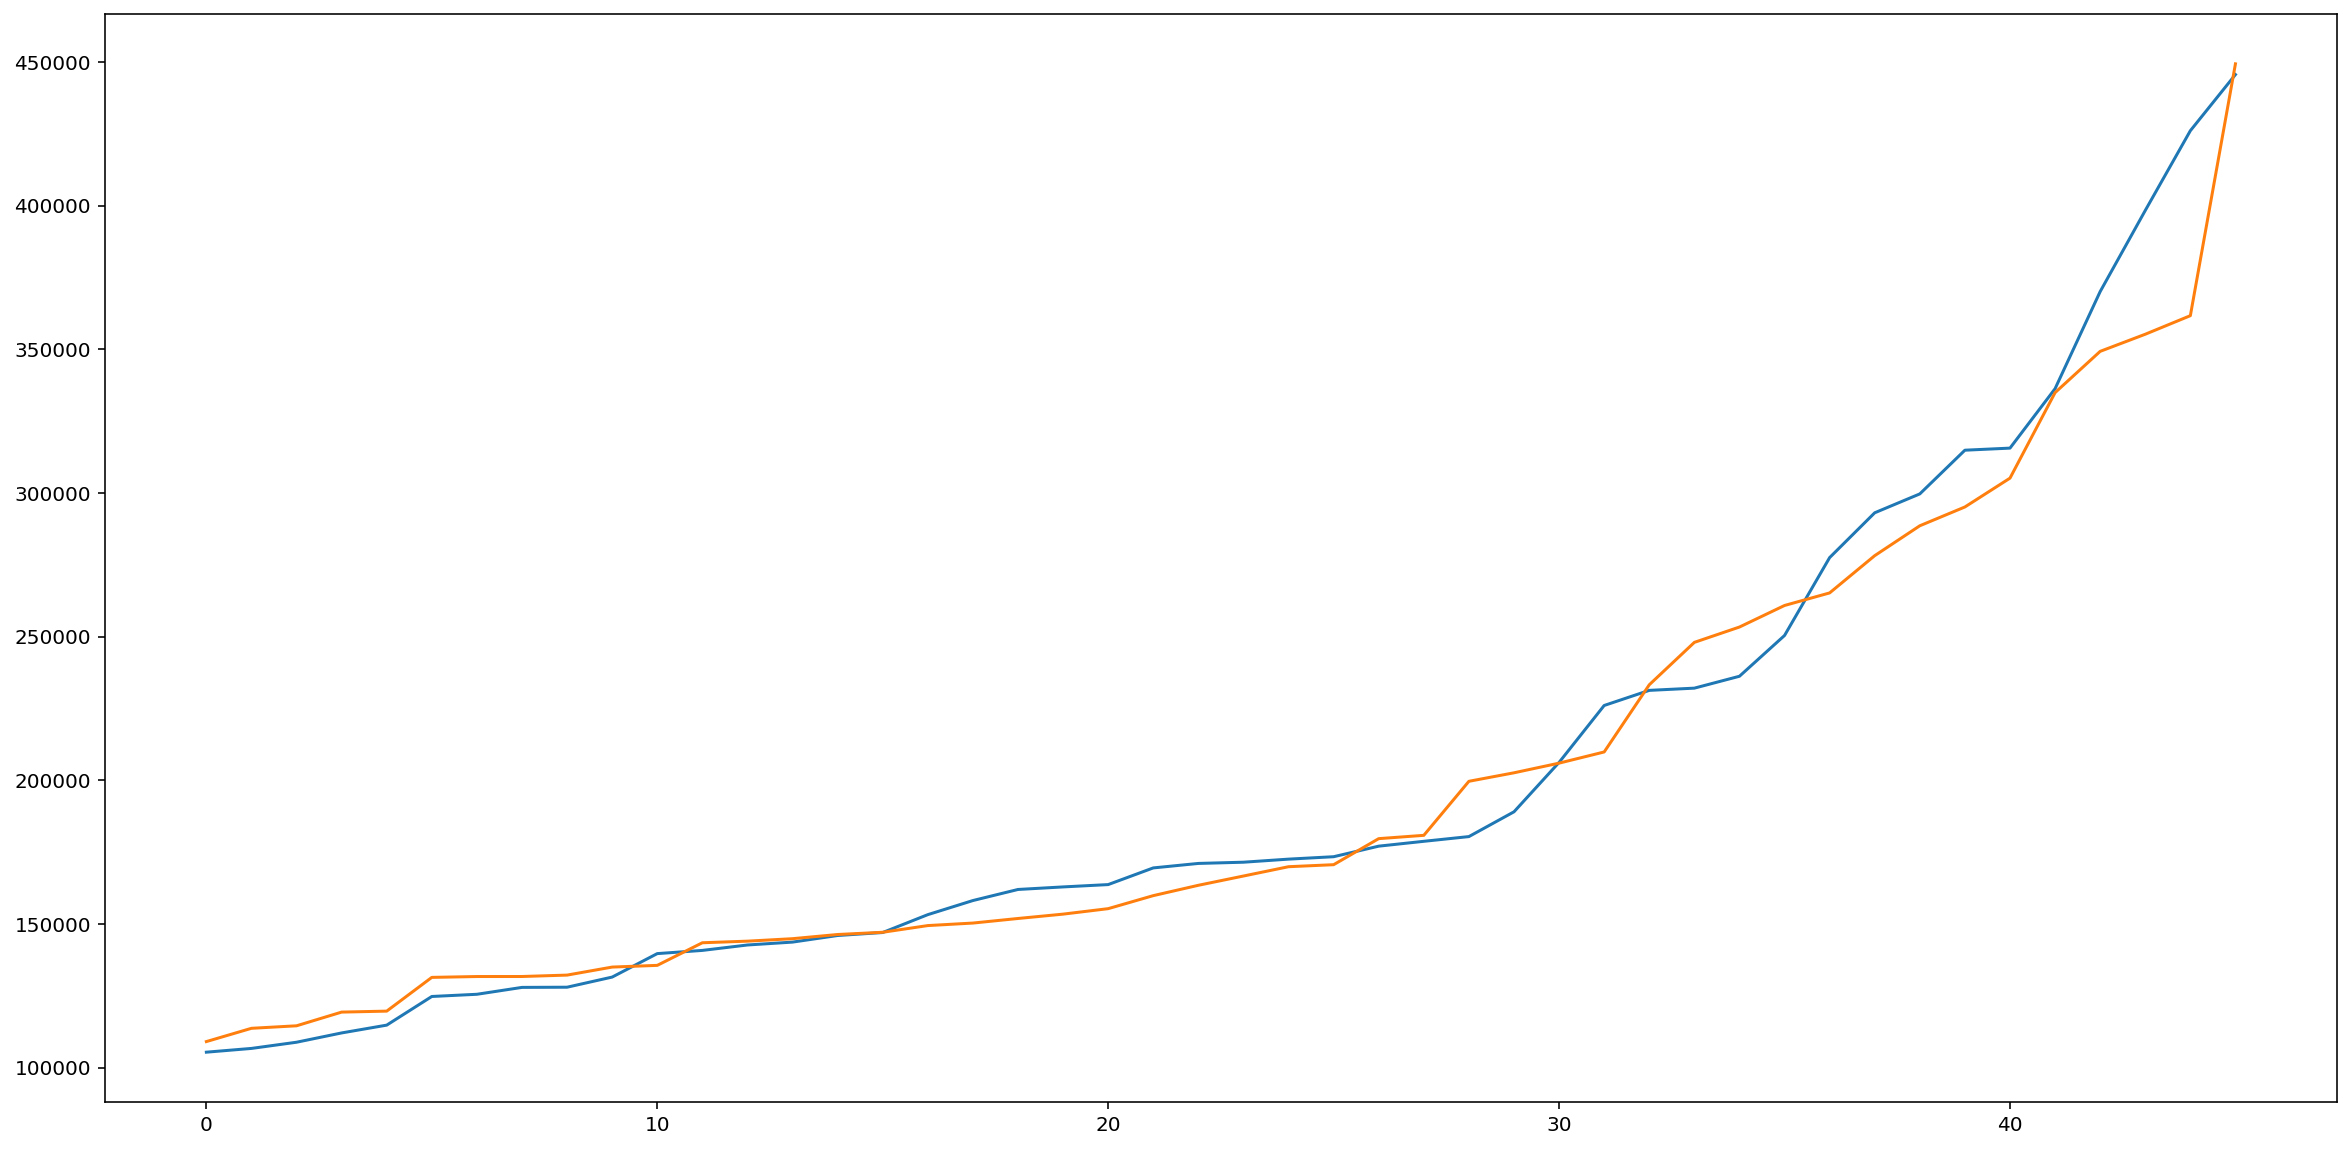



Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    6.9s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   11.5s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   20.2s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   27.7s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   44.4s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   55.7s
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:  2.0min
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:  2.4min
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed:  2.8min
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:  3.4min
[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed:  3.8min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  4.4min
[Parallel(n_jobs=4)]: Done 173 tasks      | elapsed:  4.8min
[Parallel(

Round 10
For Hospital Cost Range of [ 60000 , 490000 ]
{'extra_trees__max_depth': 25, 'extra_trees__n_estimators': 100, 'rand_forest__max_depth': 9, 'rand_forest__n_estimators': 200, 'xgb__max_depth': 9, 'xgb__n_estimators': 600}
R2 Accuracy Score: 0.7676509172488672
MSLE Accuracy Score: 0.031190625137066844


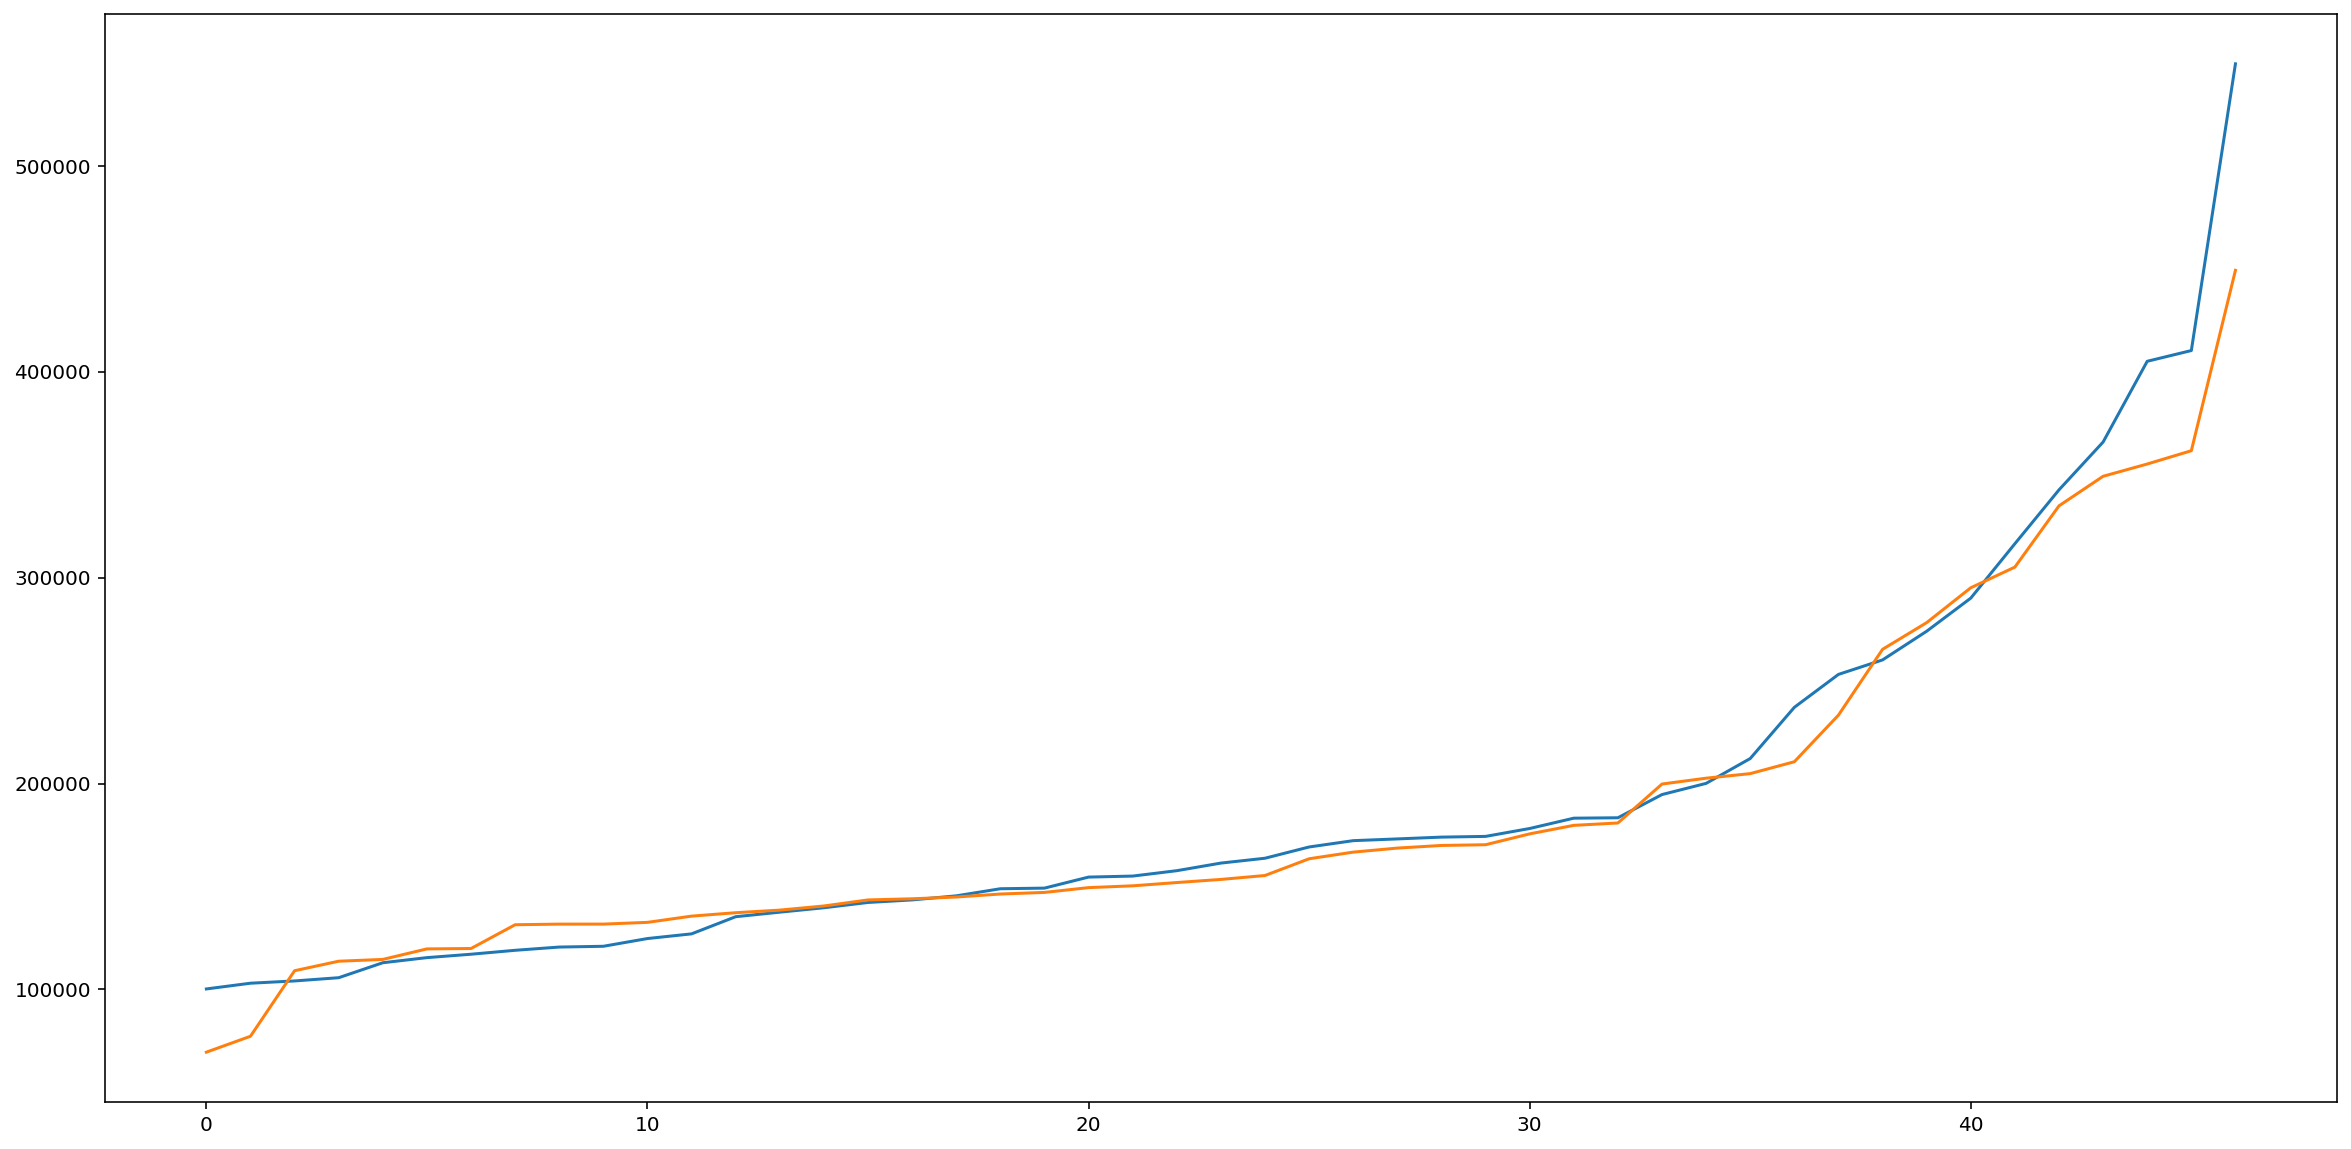



Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   12.4s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   22.0s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   40.7s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   55.3s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:  2.3min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  2.8min
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:  3.4min
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:  3.9min
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed:  4.5min
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:  5.4min
[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed:  5.9min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  7.0min
[Parallel(n_jobs=4)]: Done 173 tasks      | elapsed:  7.6min
[Parallel(

Round 11
For Hospital Cost Range of [ 50000 , 500000 ]
{'extra_trees__max_depth': 25, 'extra_trees__n_estimators': 200, 'rand_forest__max_depth': 12, 'rand_forest__n_estimators': 200, 'xgb__max_depth': 9, 'xgb__n_estimators': 600}
R2 Accuracy Score: 0.8829479877721556
MSLE Accuracy Score: 0.03342031002057433


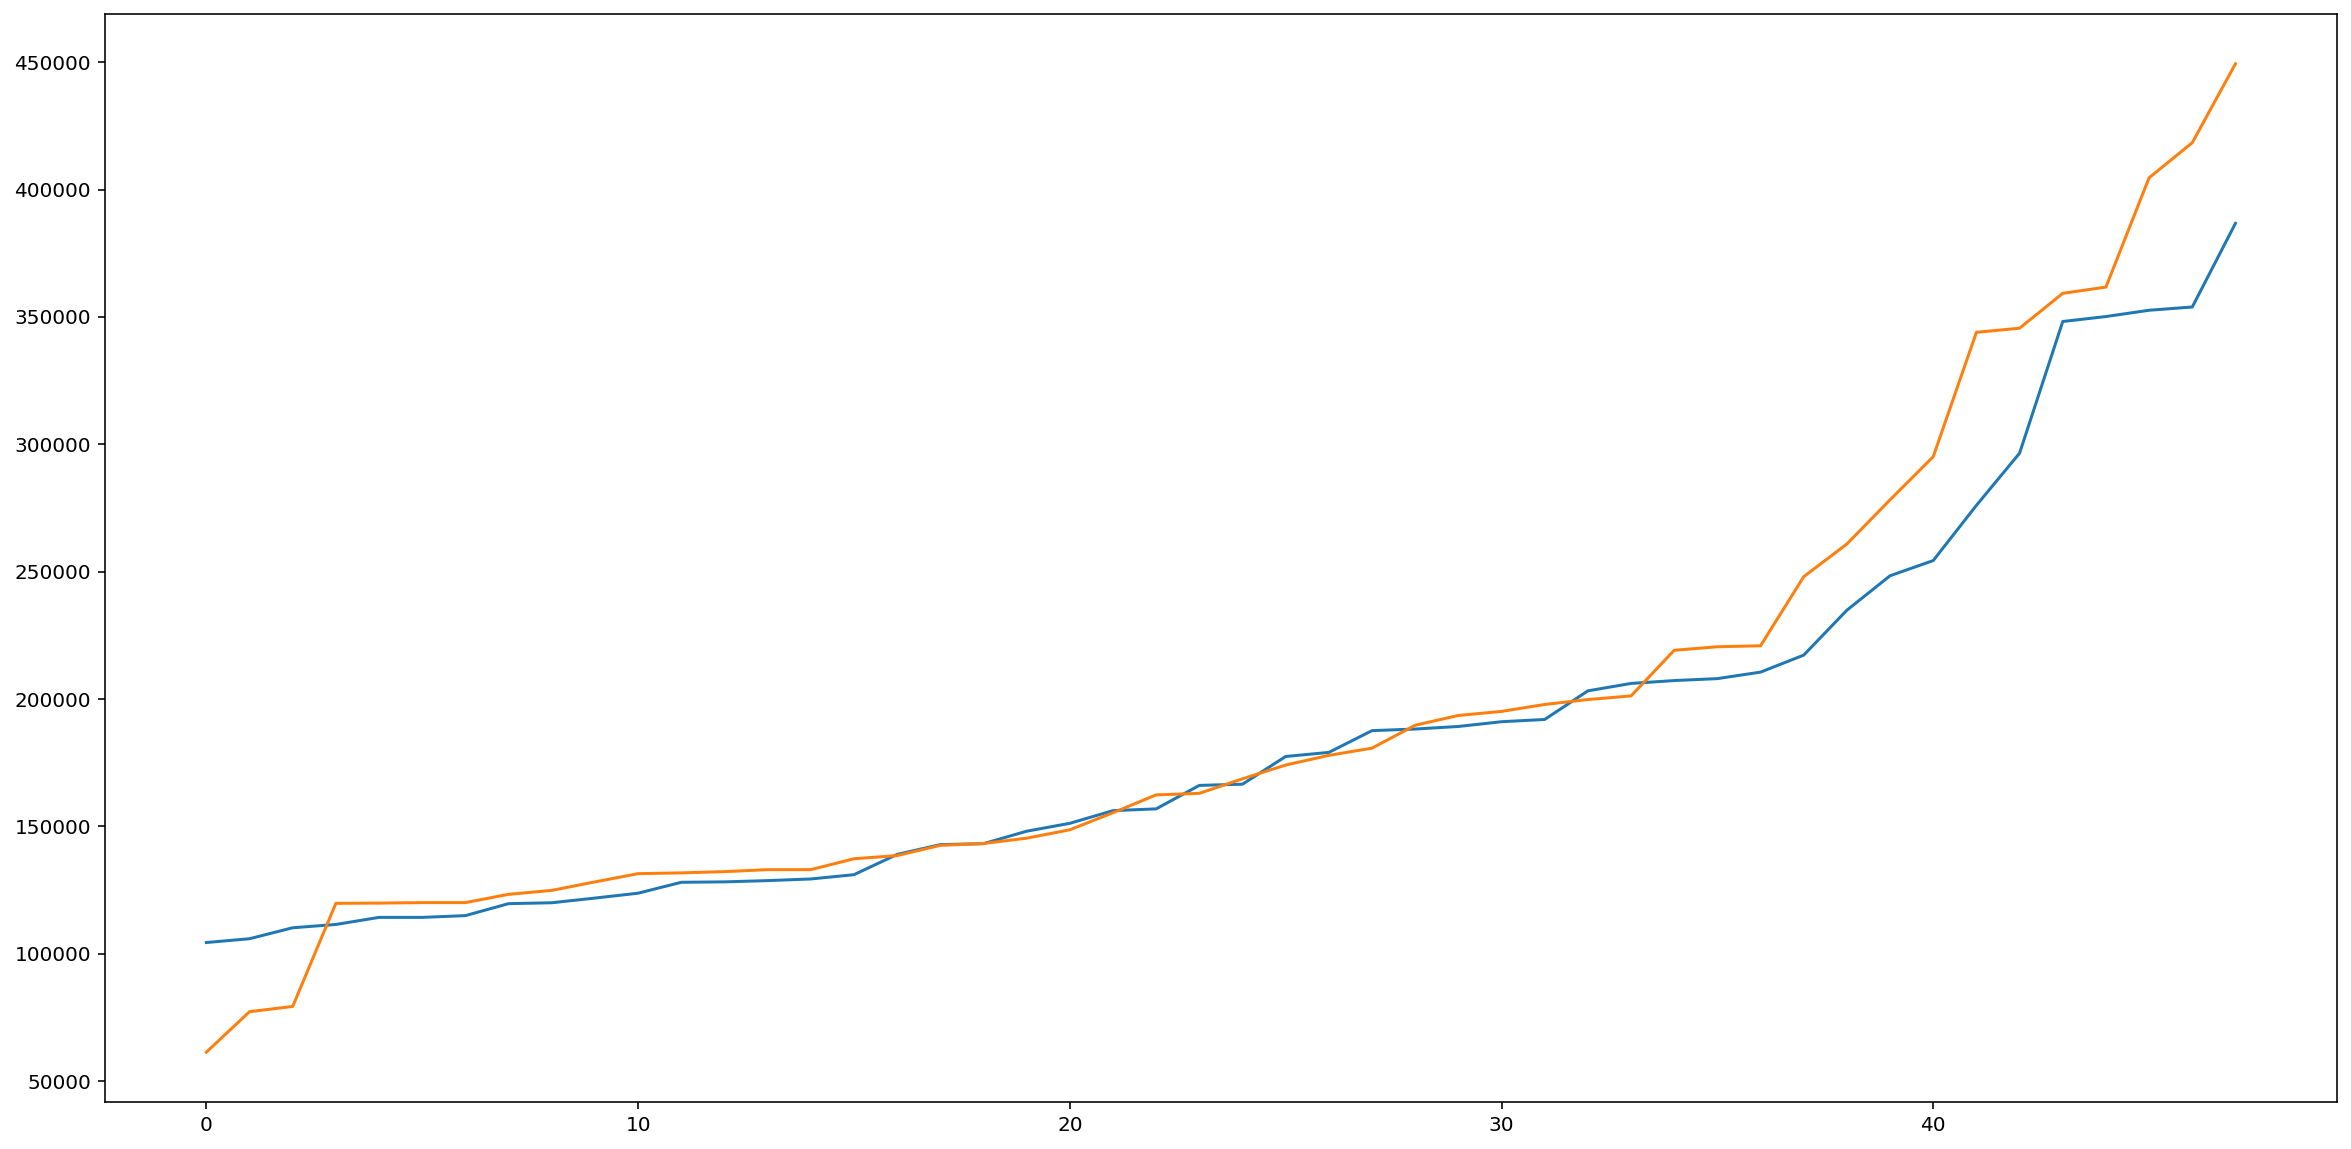



Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   12.3s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   23.0s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   39.2s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   52.7s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.9min
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:  2.3min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  2.9min
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:  3.9min
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:  4.6min
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed:  5.4min
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:  6.2min
[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed:  6.9min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  7.9min
[Parallel(n_jobs=4)]: Done 173 tasks      | elapsed:  8.7min
[Parallel(

Round 12
For Hospital Cost Range of [ 40000 , 510000 ]
{'extra_trees__max_depth': 16, 'extra_trees__n_estimators': 100, 'rand_forest__max_depth': 9, 'rand_forest__n_estimators': 100, 'xgb__max_depth': 12, 'xgb__n_estimators': 600}
R2 Accuracy Score: 0.7913517506240078
MSLE Accuracy Score: 0.042866519748927745


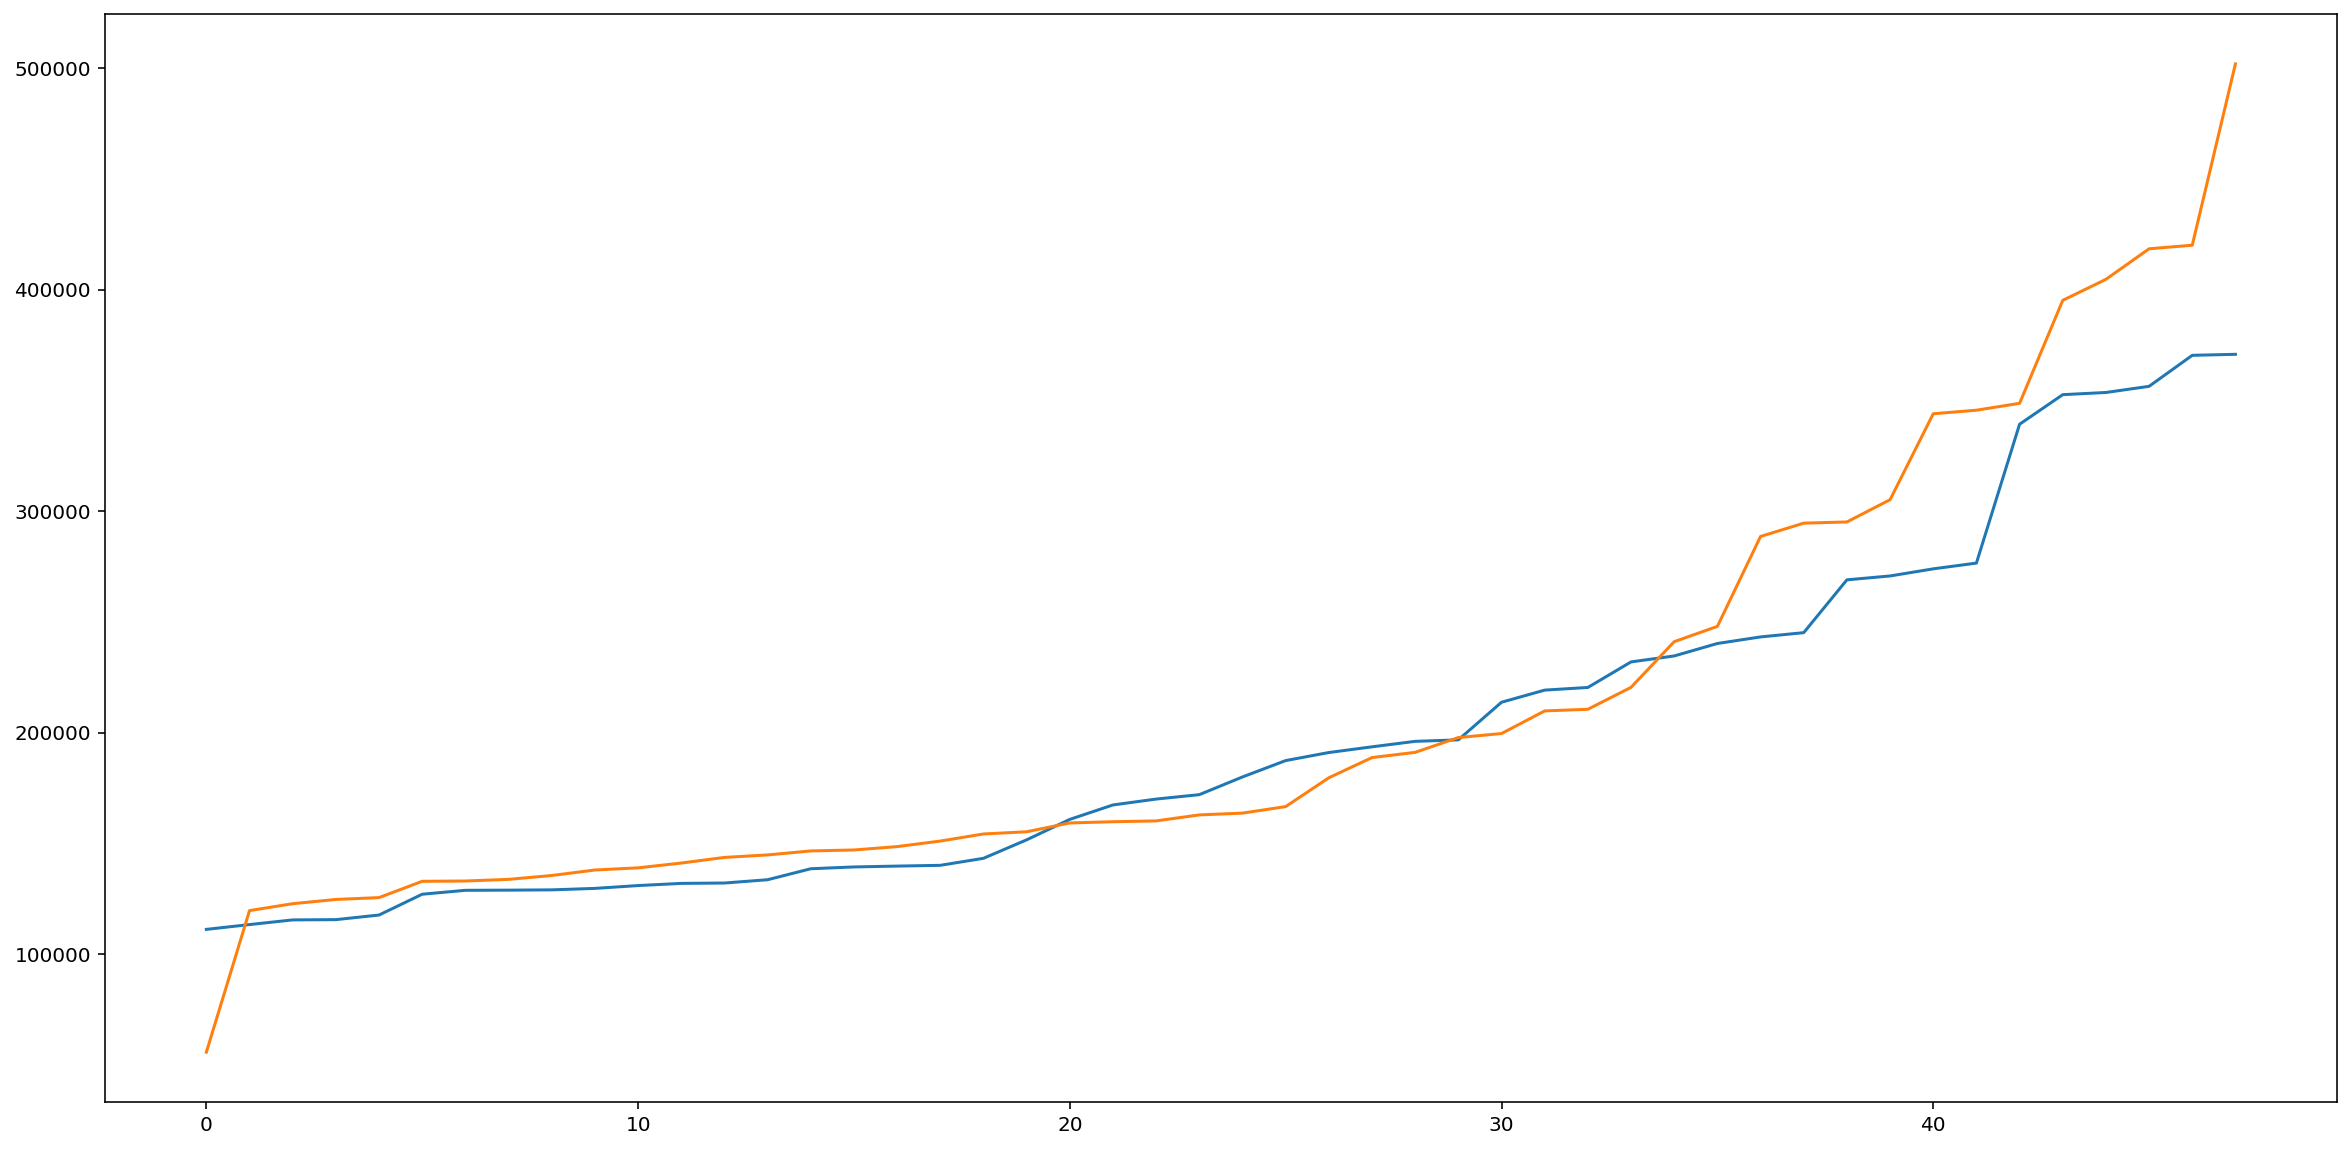



Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   11.5s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   19.1s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   33.2s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   43.2s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:  1.9min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  2.2min
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:  2.7min
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:  3.2min
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed:  3.8min
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:  4.4min
[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed:  4.8min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  5.4min
[Parallel(n_jobs=4)]: Done 173 tasks      | elapsed:  5.8min
[Parallel(

Round 13
For Hospital Cost Range of [ 30000 , 520000 ]
{'extra_trees__max_depth': 25, 'extra_trees__n_estimators': 100, 'rand_forest__max_depth': 12, 'rand_forest__n_estimators': 100, 'xgb__max_depth': 9, 'xgb__n_estimators': 400}
R2 Accuracy Score: 0.8070891938991146
MSLE Accuracy Score: 0.040223786336571234


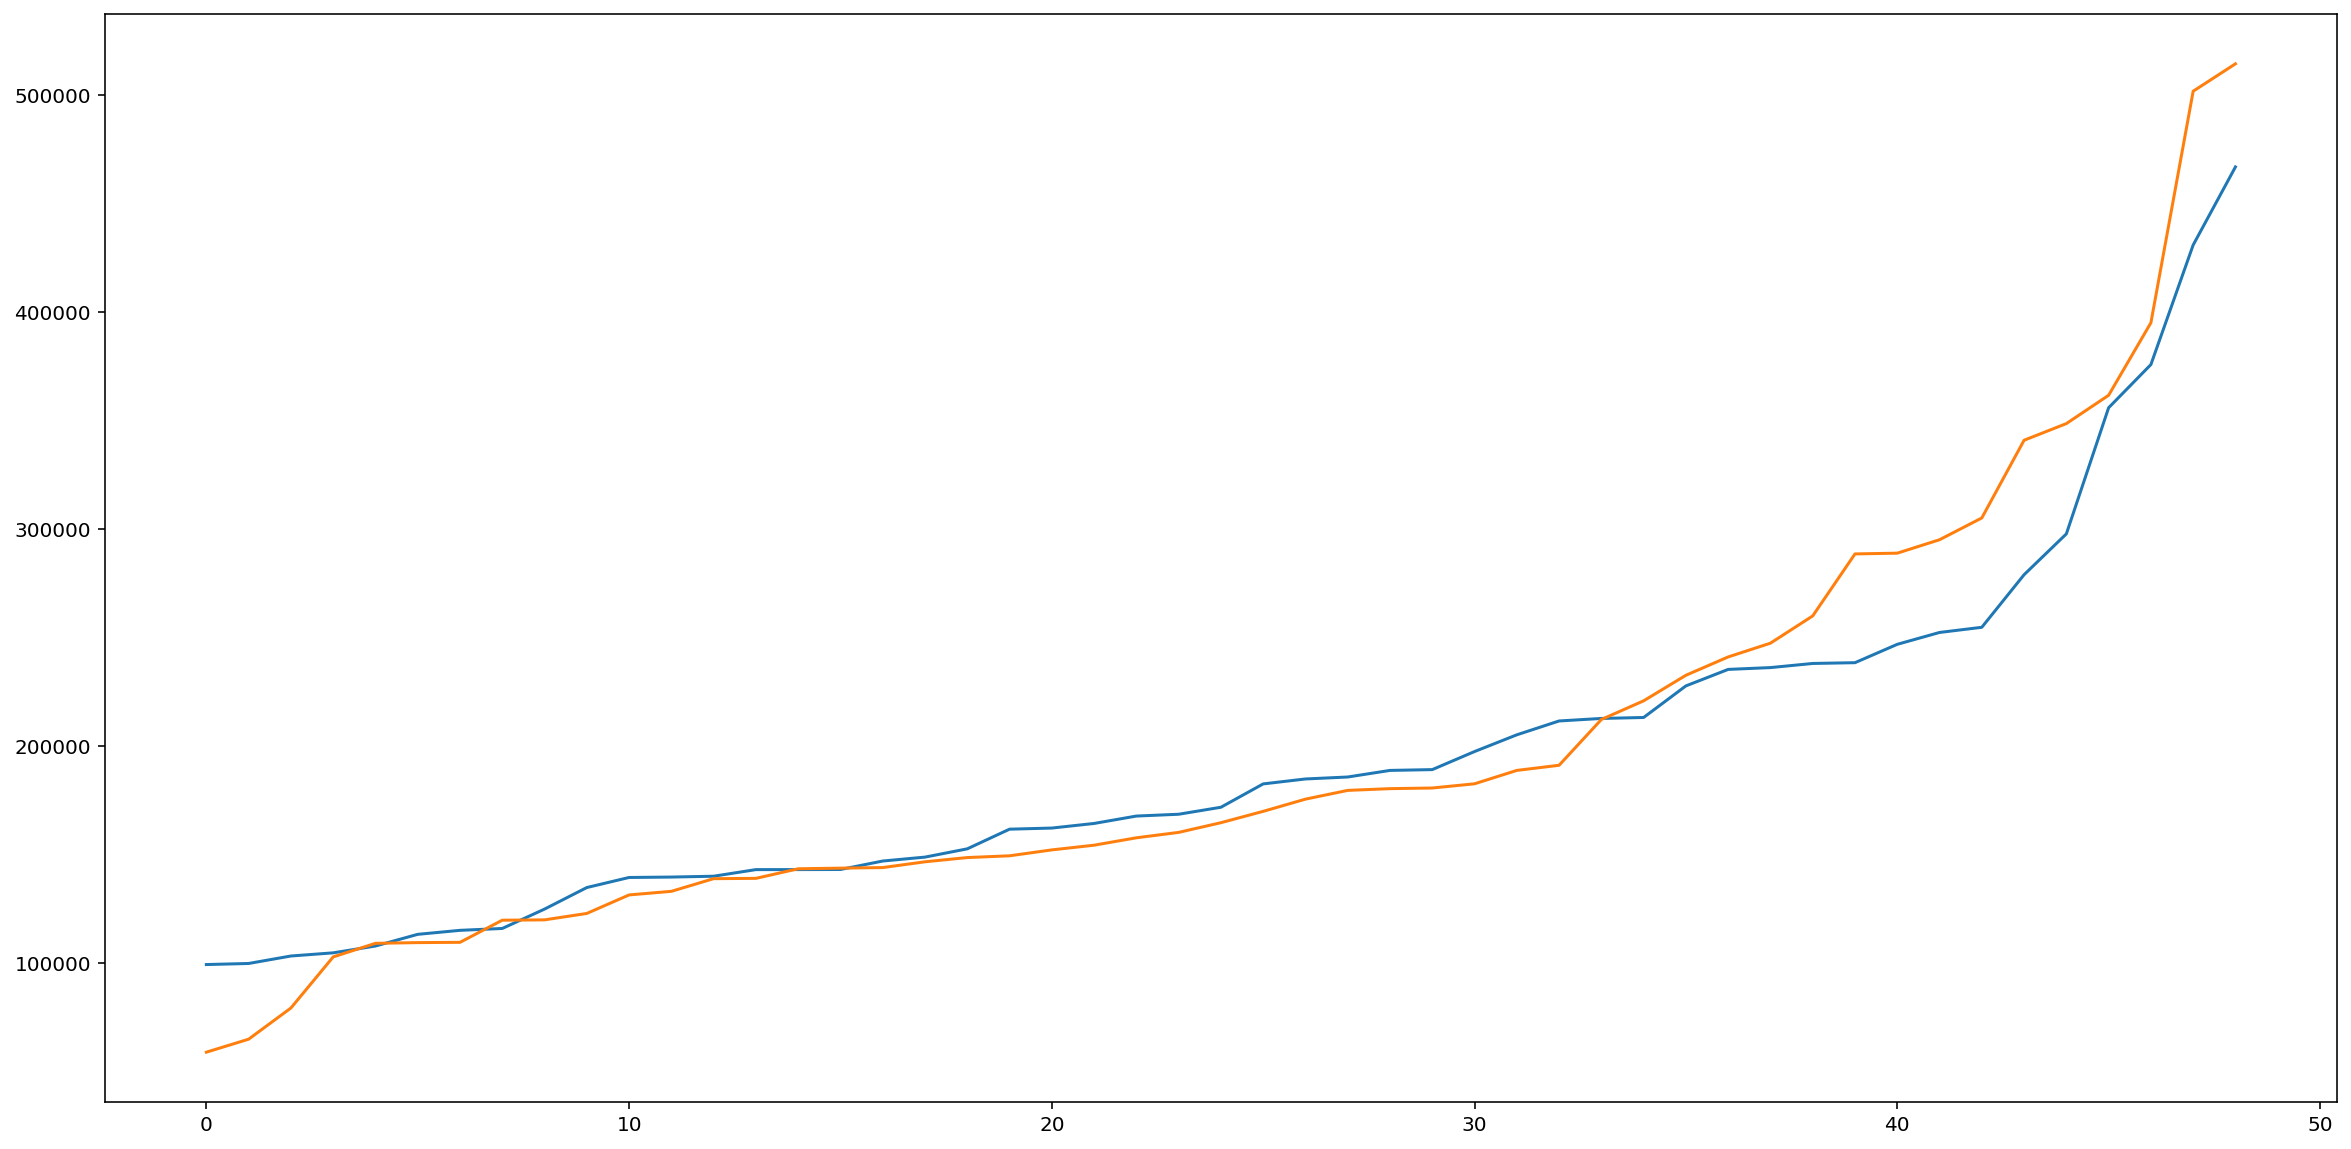



Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    8.9s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   14.3s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   32.9s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   43.5s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  2.1min
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:  2.7min
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:  3.2min
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed:  3.9min
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:  4.8min
[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed:  5.6min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  6.6min
[Parallel(n_jobs=4)]: Done 173 tasks      | elapsed:  7.6min
[Parallel(

Round 14
For Hospital Cost Range of [ 20000 , 530000 ]
{'extra_trees__max_depth': 25, 'extra_trees__n_estimators': 100, 'rand_forest__max_depth': 12, 'rand_forest__n_estimators': 100, 'xgb__max_depth': 9, 'xgb__n_estimators': 400}
R2 Accuracy Score: 0.8070891938991146
MSLE Accuracy Score: 0.040223786336571234


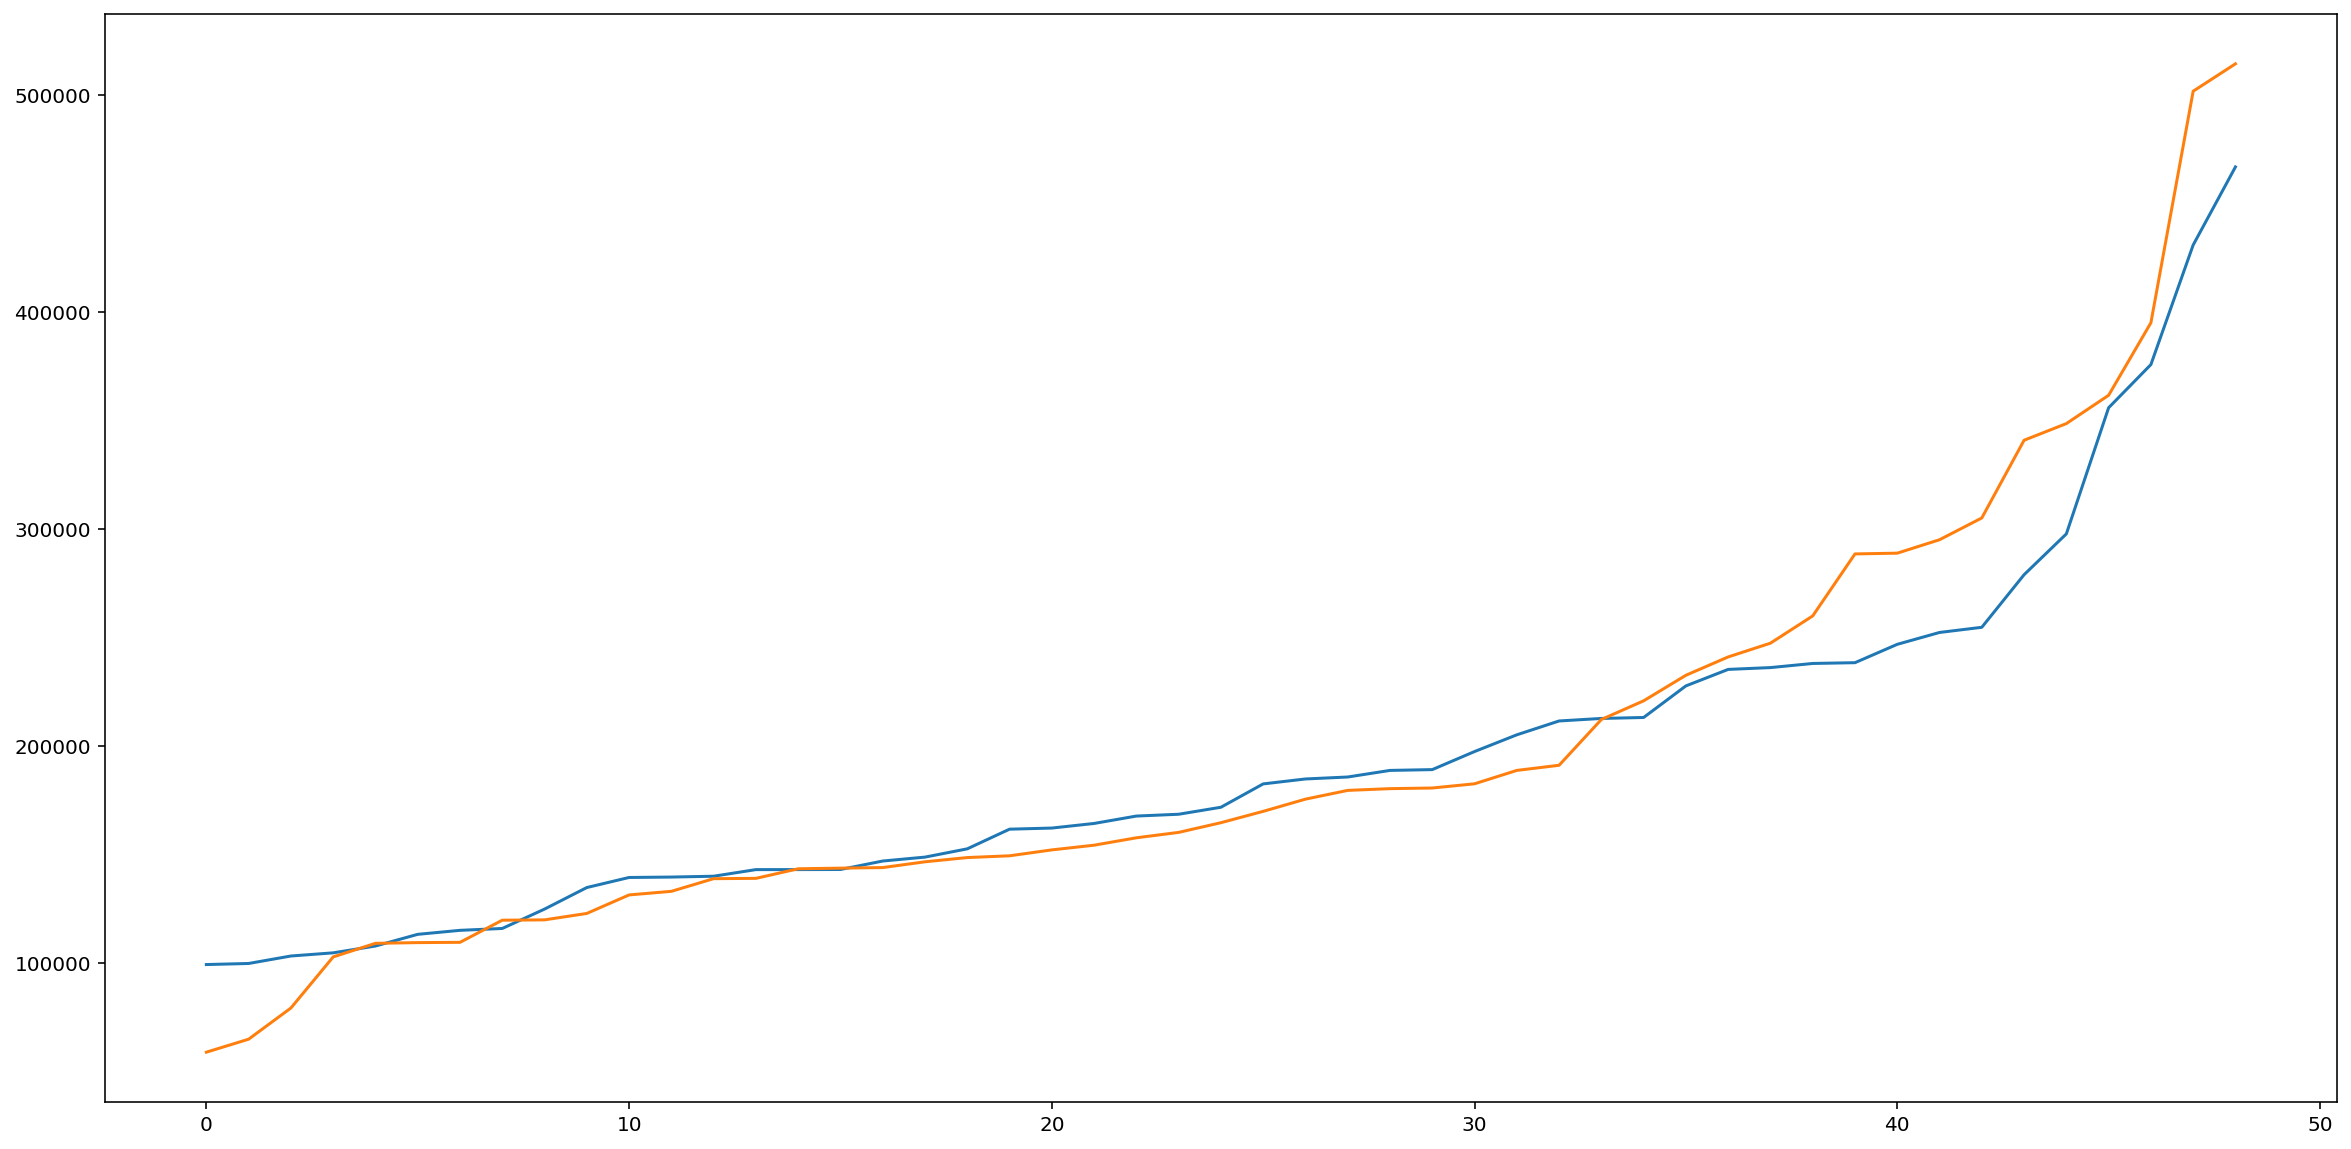



Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   10.9s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   19.3s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   37.6s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   50.7s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:  2.1min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  2.6min
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:  3.3min
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:  3.9min
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed:  4.7min
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:  5.5min
[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed:  6.2min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  7.1min
[Parallel(n_jobs=4)]: Done 173 tasks      | elapsed:  7.7min
[Parallel(

Round 15
For Hospital Cost Range of [ 10000 , 540000 ]
{'extra_trees__max_depth': 25, 'extra_trees__n_estimators': 100, 'rand_forest__max_depth': 12, 'rand_forest__n_estimators': 100, 'xgb__max_depth': 12, 'xgb__n_estimators': 400}

 ERROR: Infinite values - no successful model


CPU times: user 2min 13s, sys: 4.55 s, total: 2min 18s
Wall time: 2h 51min 34s


In [34]:
%%time 

warnings.filterwarnings('ignore')

low_correlation_columns = ['HR PULSE', 'RR', 'HB']


def get_best_fit(df, parameters, i=0, add_squares=True, filter_outliers=True, 
                 remove_num_cols = low_correlation_columns, use_grid=True, final_estimator=False):
    
    lower_range = 150000 - i * 10000
    higher_range= 400000 + i * 10000
    
    X_train, X_test, y_train, y_test = \
                    data_prepare(df, add_squares=add_squares, filter_outliers=filter_outliers, 
                                     lower_range=lower_range, higher_range=higher_range, 
                                     remove_num_cols = remove_num_cols)

    rand_state = 43
    


    estimators = [  ('rand_forest', RandomForestRegressor(random_state=rand_state)),
                    ('extra_trees', ExtraTreesRegressor(random_state=rand_state)),    
                    ('linear', LinearRegression()),
                    ('xgb', xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.2, 
                                             alpha = 10, learning_rate = 0.008))
                 ]

    if final_estimator == True:
        reg = StackingRegressor(estimators=estimators, final_estimator=LinearRegression(), passthrough=True)
    else:
        reg = StackingRegressor(estimators=estimators)
    
    if use_grid == True:
        clf = GridSearchCV(reg, parameters, verbose=10, n_jobs=4)
        clf.fit(X_train, np.log(y_train))
    else:
        reg.fit(X_train, np.log(y_train))
    
    print('Round', i+1)

    if filter_outliers == True:
            print('For Hospital Cost Range of [', lower_range, ',', higher_range, ']')

    try: 
        if use_grid == True:
            y_pred = clf.predict(X_test)
            print (clf.best_params_)
        else:
            y_pred = reg.predict(X_test)
            
        print('R2 Accuracy Score:', r2_score(y_test, np.exp(y_pred)))
        print('MSLE Accuracy Score:', mean_squared_log_error(y_test, np.exp(y_pred)))
        plt.figure(figsize=(20,10))
        plt.plot(range(0, len(y_pred)), np.sort(np.exp(y_pred), axis=0))
        plt.plot(range(0, len(y_test)), np.sort(y_test, axis=0))
        plt.show()
    except: 
        print('\n ERROR: Infinite values - no successful model')
        
    print('\n')

    
parameters = {
              'rand_forest__n_estimators':[100, 200], 
              'extra_trees__n_estimators':[100, 200],
              'xgb__n_estimators':[400, 600],
              'rand_forest__max_depth':[9, 12], 
              'extra_trees__max_depth':[16, 25], 
              'xgb__max_depth':[9, 12]
             }

for i in range(15):
    get_best_fit(df, parameters, i=i, add_squares=True, filter_outliers=True, 
                 remove_num_cols = low_correlation_columns)
    

## Regression on the full range of the Target Variable

Round 1
R2 Accuracy Score: 0.7247472595985966
MSLE Accuracy Score: 0.05723347536052097


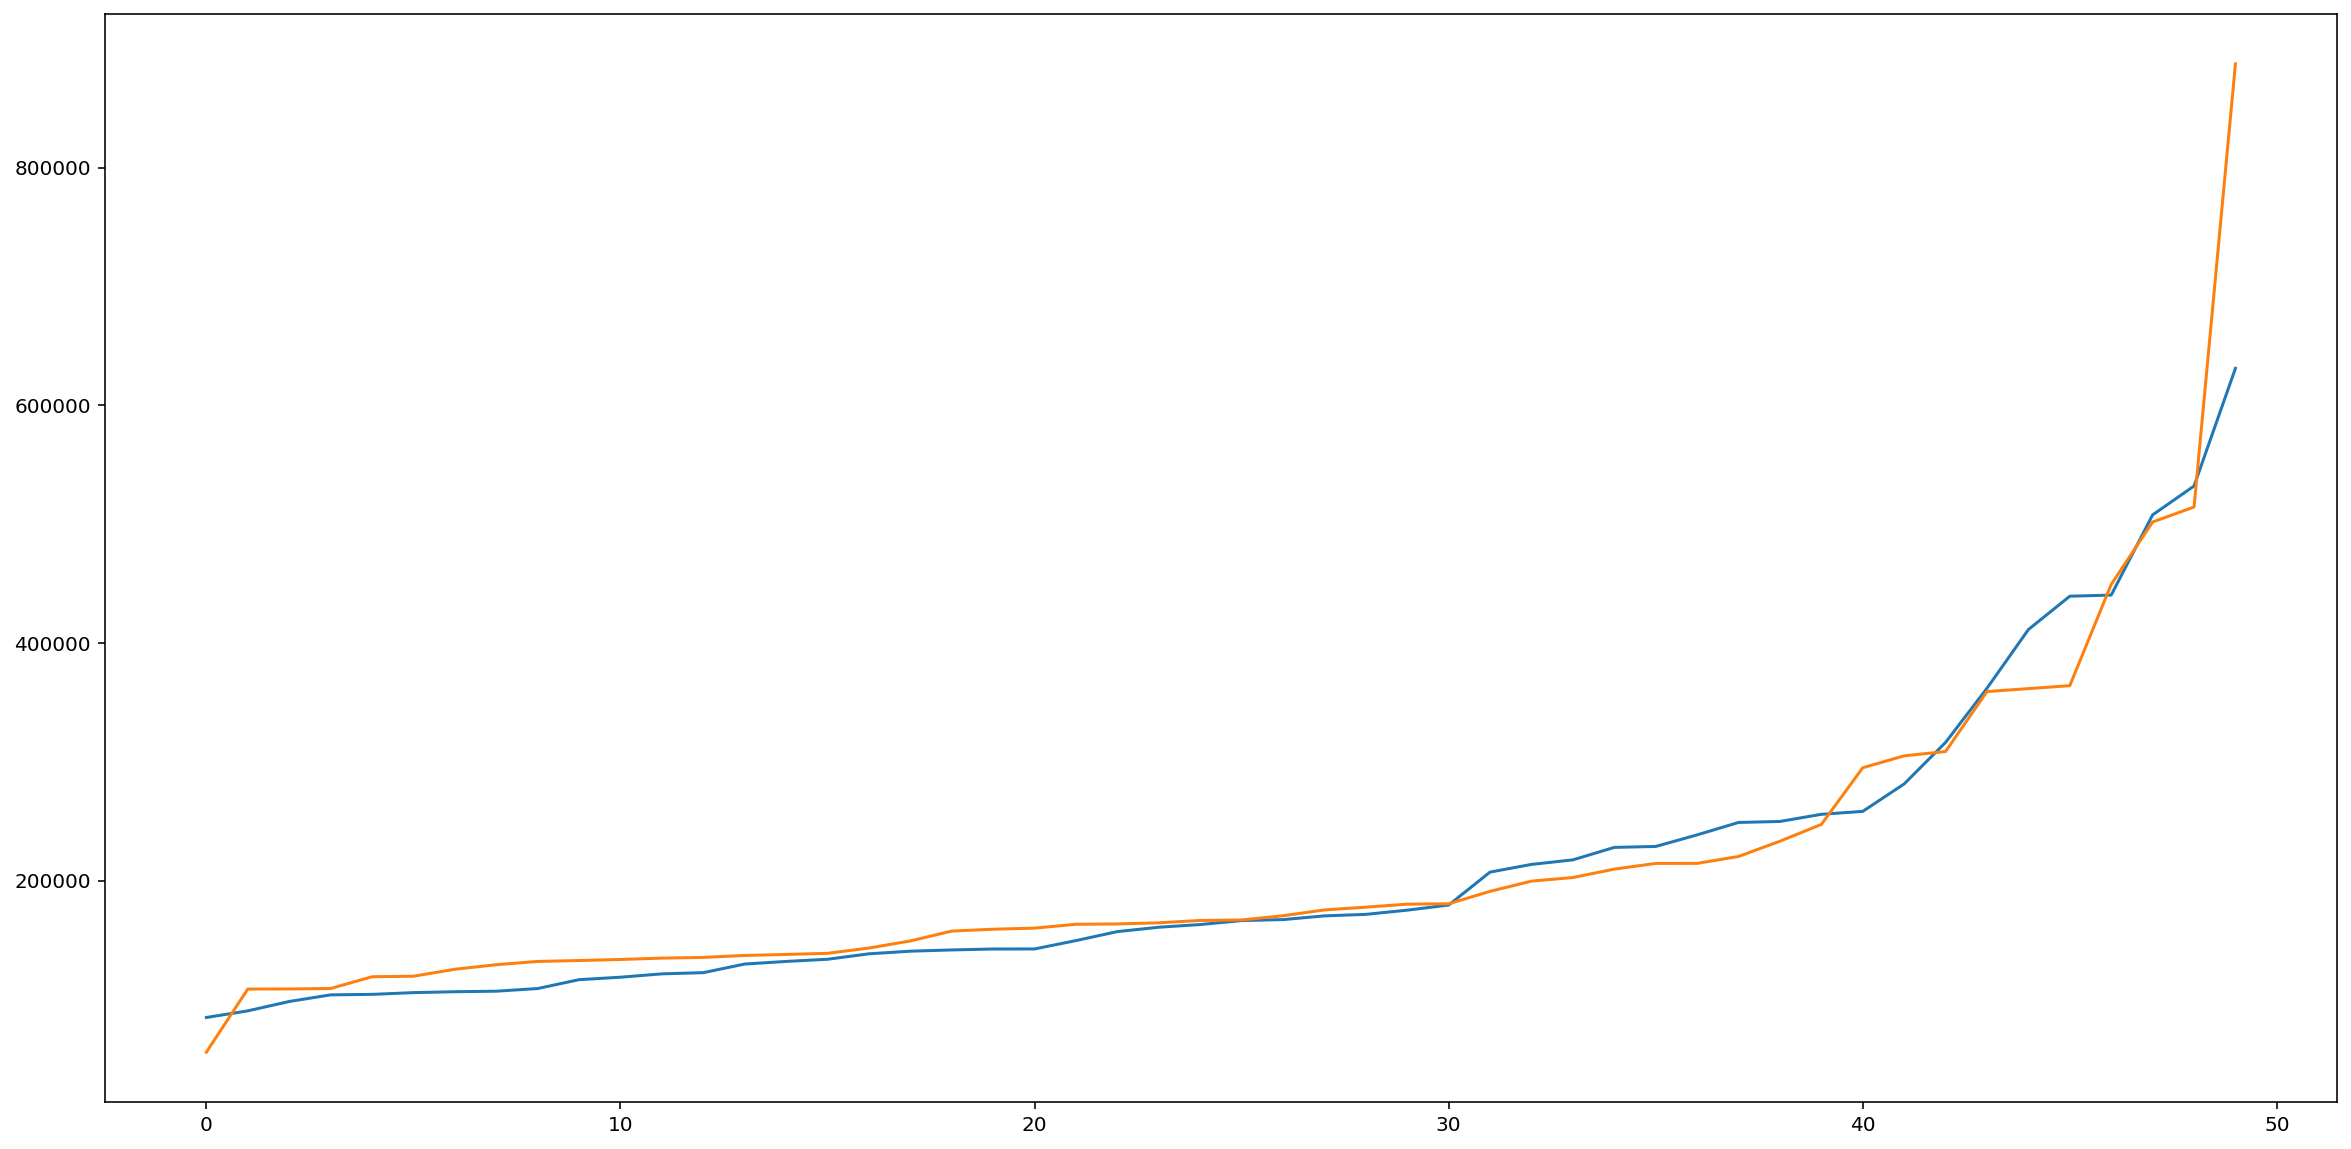



CPU times: user 4.04 s, sys: 288 ms, total: 4.32 s
Wall time: 3.4 s


In [35]:
%%time 

parameters = {
              'rand_forest__n_estimators':[100], 
              'extra_trees__n_estimators':[100,],
              'xgb__n_estimators':[200],
              'rand_forest__max_depth':[12], 
              'extra_trees__max_depth':[12], 
              'xgb__max_depth':[12]
             }    
    
    
get_best_fit(df, parameters, add_squares=True, filter_outliers=False, 
             remove_num_cols = [], use_grid=False, final_estimator=True)
    